In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-pm25/data_pm.xlsx
/kaggle/input/data-pm25/2023_2024.xlsx
/kaggle/input/data-pm25/2024.xlsx
/kaggle/input/data-pm25/cleaned_data.xlsx


In [ ]:
import pandas as pd
# Asumsi: df sudah dimuat dari file 'data_pm.xlsx'

# --- MENAMPILKAN 5 BARIS DATA AWAL (HEADER) ---
print("Baris Data Awal (.head()):")
print(df.head())

# --- MENAMPILKAN 5 BARIS DATA AKHIR (TAIL) ---
print("\nBaris Data Akhir (.tail()):")
print(df.tail())

/tmp/ipykernel_36/1601456480.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['PM2.5'].fillna(df_filtered['PM2.5'].median(), inplace=True)


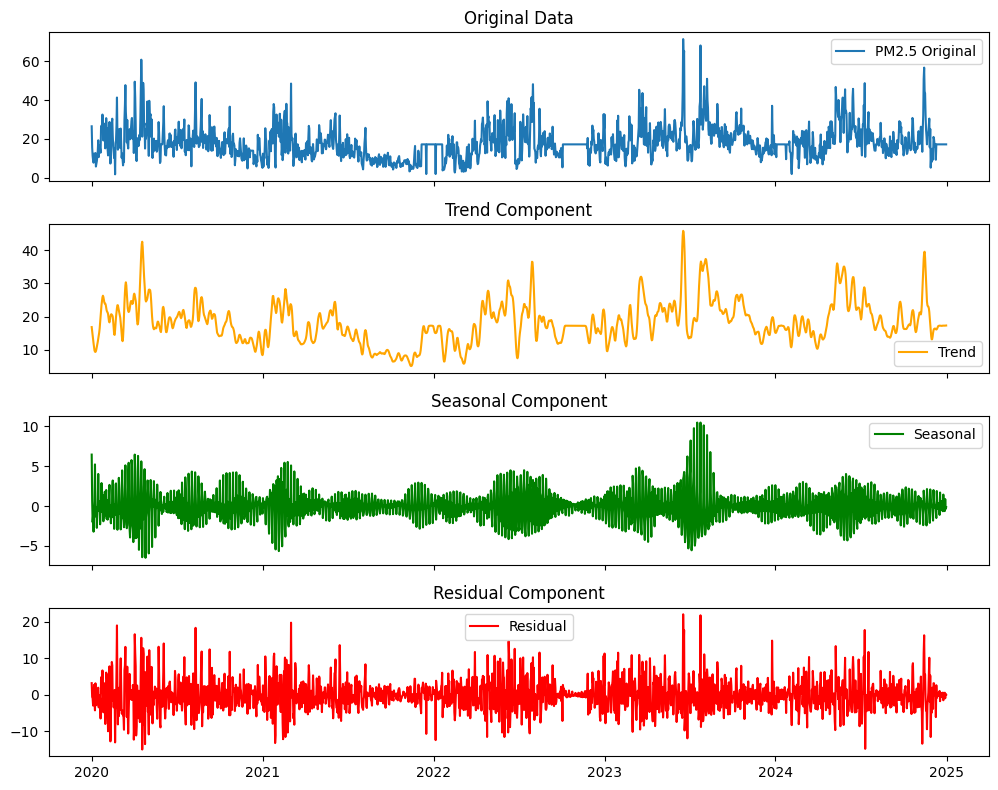

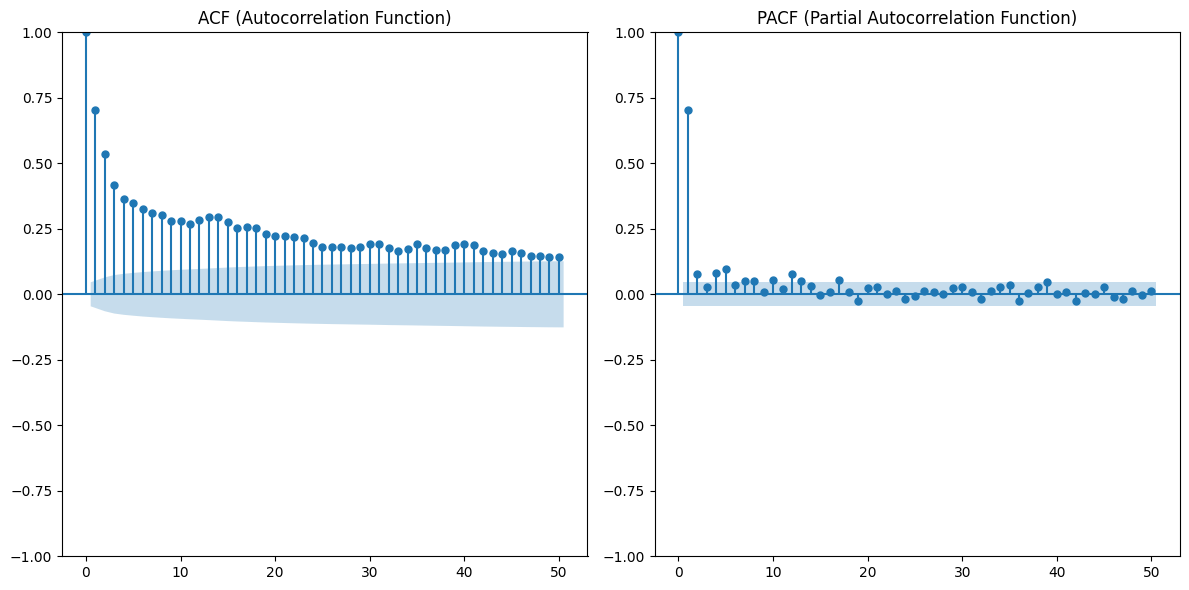

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Memuat file Excel
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Memastikan tipe data Tanggal sudah datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Memotong data berdasarkan tahun (2020-2024)
df['Year'] = df['Tanggal'].dt.year
df_filtered = df[df['Year'].isin([2020, 2021, 2022, 2023, 2024])]

# Menangani missing value dengan imputasi menggunakan median
df_filtered['PM2.5'].fillna(df_filtered['PM2.5'].median(), inplace=True)

# Menetapkan kolom Tanggal sebagai index
df_filtered.set_index('Tanggal', inplace=True)

# Dekomposisi STL untuk memisahkan komponen Tren, Musiman, dan Residual
stl = STL(df_filtered['PM2.5'], seasonal=13)
result = stl.fit()

# Menampilkan hasil dekomposisi
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Plot original data
axes[0].plot(df_filtered['PM2.5'], label='PM2.5 Original')
axes[0].set_title('Original Data')
axes[0].legend()

# Plot tren
axes[1].plot(result.trend, label='Trend', color='orange')
axes[1].set_title('Trend Component')
axes[1].legend()

# Plot musiman
axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_title('Seasonal Component')
axes[2].legend()

# Plot residual
axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_title('Residual Component')
axes[3].legend()

plt.tight_layout()
plt.show()

# Plot ACF dan PACF untuk melihat ketergantungan antar waktu
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(121)
plot_acf(df_filtered['PM2.5'], lags=50, ax=plt.gca())
plt.title('ACF (Autocorrelation Function)')

# Plot PACF
plt.subplot(122)
plot_pacf(df_filtered['PM2.5'], lags=50, ax=plt.gca())
plt.title('PACF (Partial Autocorrelation Function)')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.impute import KNNImputer

# Menyiapkan data untuk imputasi KNN (menggunakan hanya kolom PM2.5)
df_knn = df_filtered[['PM2.5']]

# Menggunakan KNN untuk imputasi missing value
imputer = KNNImputer(n_neighbors=5)  # Tentukan k (jumlah tetangga terdekat)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=['PM2.5'])

# Mengecek apakah missing value sudah terisi
missing_values_after_knn = df_knn_imputed.isnull().sum()

# Menampilkan hasil imputasi KNN
print(f"Missing values setelah imputasi KNN: {missing_values_after_knn}")


Missing values setelah imputasi KNN: PM2.5    0
dtype: int64


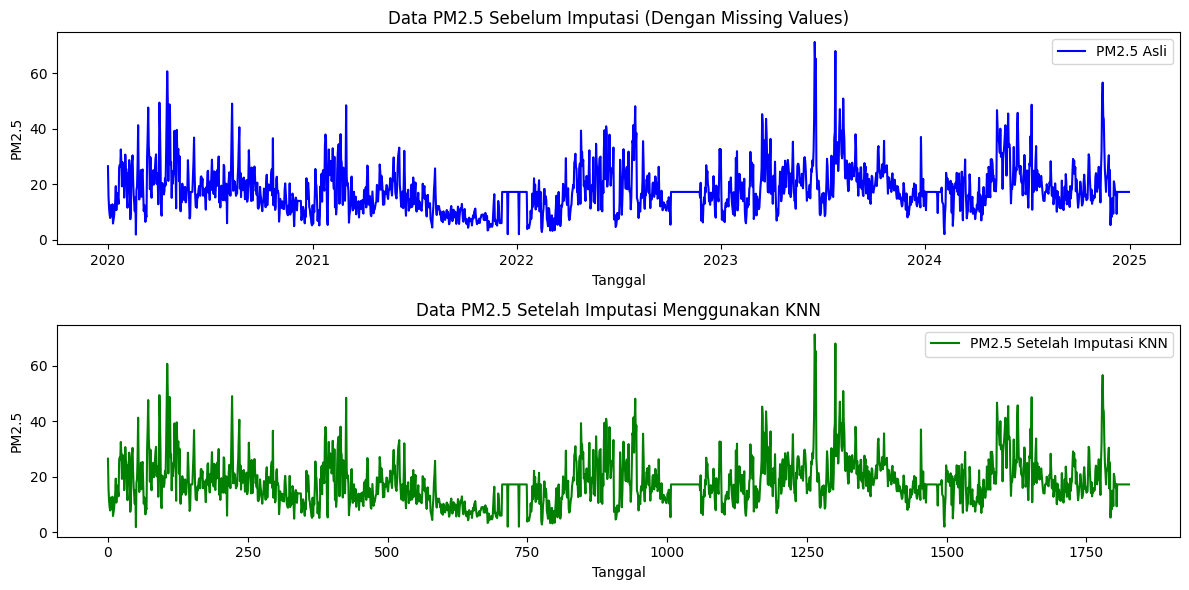

In [6]:
import matplotlib.pyplot as plt

# Menampilkan data PM2.5 sebelum imputasi (dengan missing values)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_filtered['PM2.5'], label='PM2.5 Asli', color='blue')
plt.title('Data PM2.5 Sebelum Imputasi (Dengan Missing Values)')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.legend()

# Menampilkan data PM2.5 setelah imputasi KNN
plt.subplot(2, 1, 2)
plt.plot(df_knn_imputed['PM2.5'], label='PM2.5 Setelah Imputasi KNN', color='green')
plt.title('Data PM2.5 Setelah Imputasi Menggunakan KNN')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


--- Memulai Grid Search ARIMA ---
ARIMA(0, 0, 0) - MAPE: 26.16%, MAE: 3.96, RMSE: 5.08
ARIMA(0, 0, 1) - MAPE: 26.16%, MAE: 3.96, RMSE: 5.08
ARIMA(0, 0, 2) - MAPE: 26.17%, MAE: 3.97, RMSE: 5.08
ARIMA(1, 0, 0) - MAPE: 26.20%, MAE: 3.97, RMSE: 5.08
ARIMA(1, 0, 1) - MAPE: 26.23%, MAE: 3.97, RMSE: 5.09
ARIMA(1, 0, 2) - MAPE: 25.97%, MAE: 3.94, RMSE: 5.05
ARIMA(2, 0, 0) - MAPE: 26.22%, MAE: 3.97, RMSE: 5.08


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - MAPE: 25.89%, MAE: 3.95, RMSE: 5.04
ARIMA(2, 0, 2) - MAPE: 25.88%, MAE: 3.94, RMSE: 5.04

FINAL MODEL EVALUATION ARIMA TERBAIK
Model Terbaik: (2, 0, 2)
MAE: 3.94, RMSE: 5.04, MAPE: 25.88%


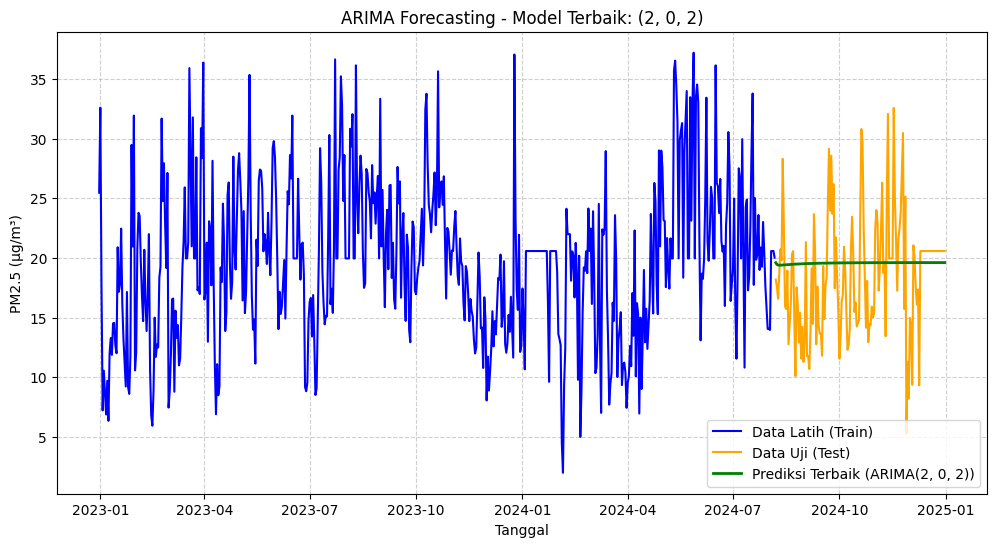

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING (Sesuai Konteks Penelitian) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# Potong data ke 2 tahun terakhir
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Re-index dan Imputasi KNN
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                            columns=df_numeric.columns, 
                            index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# Penanganan Outlier (Ganti dengan Median)
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 
y = y_clean 

# --- 2. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y) * TRAIN_RATIO)
y_train, y_test = y[:split], y[split:]

# --- 3. FUNGSI EVALUASI ---
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# --- 4. GRID SEARCH (Untuk Menemukan Model Terbaik) ---
P_LIST = [0, 1, 2]
Q_LIST = [0, 1, 2]
D_LIST = [0]
best_mape = float('inf')
best_model = None
best_params = None

print("--- Memulai Grid Search ARIMA ---")

for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            try:
                model = ARIMA(y_train, order=(p, d, q))
                fit = model.fit() 
                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                pred_mean = pred.predicted_mean
                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                
                print(f"ARIMA({p}, {d}, {q}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                if mape < best_mape:
                    best_mape = mape
                    best_model = fit
                    best_params = (p, d, q)
            except:
                continue

# --- 5. HASIL AKHIR DAN PLOT VISUALISASI ---

if best_model is None:
    print("\nTidak ada model ARIMA yang berhasil dikonvergensi.")
else:
    # --- EVALUASI MODEL TERBAIK ---
    pred_best = best_model.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean = pred_best.predicted_mean
    mae, mse, rmse, mape = evaluate_model(y_test, pred_best_mean)
    
    # Menampilkan Final Model Evaluation
    print("\n" + "="*50)
    print("FINAL MODEL EVALUATION ARIMA TERBAIK")
    print(f"Model Terbaik: {best_params}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    print("="*50)

    # --- VISUALISASI HASIL PREDIKSI ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Data Latih (Train)', color='blue')
    plt.plot(y_test.index, y_test, label='Data Uji (Test)', color='orange')
    plt.plot(pred_best_mean.index, pred_best_mean, 
             label=f'Prediksi Terbaik (ARIMA{best_params})', color='green', linewidth=2)
    
    plt.title(f'ARIMA Forecasting - Model Terbaik: {best_params}')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

--- Memulai Grid Search ARIMA ---
ARIMA(0, 0, 0) - MAPE: 23.73%, MAE: 4.23, RMSE: 5.59
ARIMA(0, 0, 1) - MAPE: 23.71%, MAE: 4.22, RMSE: 5.58
ARIMA(0, 0, 2) - MAPE: 23.70%, MAE: 4.21, RMSE: 5.55
ARIMA(1, 0, 0) - MAPE: 23.67%, MAE: 4.19, RMSE: 5.48
ARIMA(1, 0, 1) - MAPE: 23.65%, MAE: 4.16, RMSE: 5.42
ARIMA(1, 0, 2) - MAPE: 23.67%, MAE: 4.13, RMSE: 5.33
ARIMA(2, 0, 0) - MAPE: 23.65%, MAE: 4.17, RMSE: 5.44
ARIMA(2, 0, 1) - MAPE: 23.81%, MAE: 4.08, RMSE: 5.22
ARIMA(2, 0, 2) - MAPE: 23.81%, MAE: 4.08, RMSE: 5.22

FINAL MODEL EVALUATION ARIMA TERBAIK
Model Terbaik: (1, 0, 1)
MAE: 4.16, RMSE: 5.42, MAPE: 23.65%


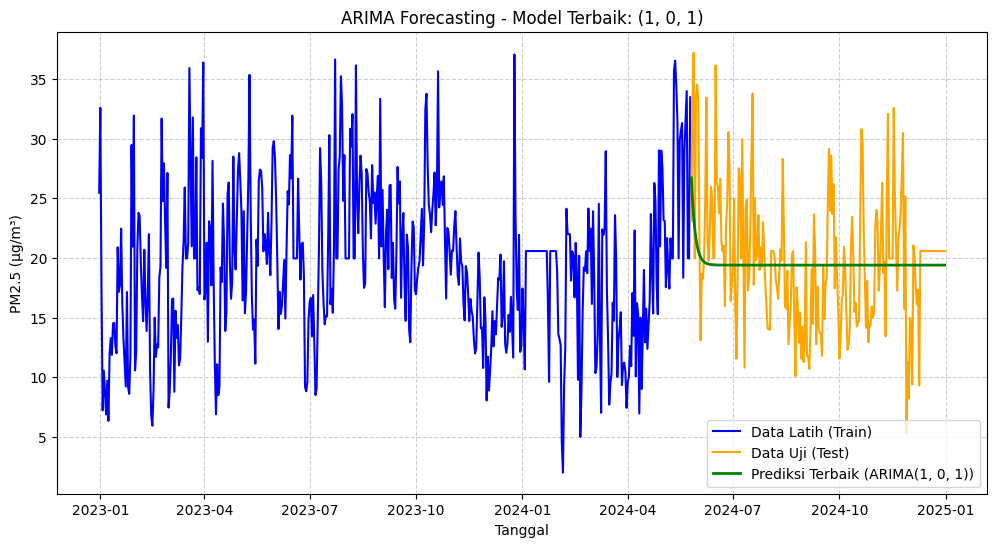

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING (Sesuai Konteks Penelitian) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# Potong data ke 2 tahun terakhir
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Re-index dan Imputasi KNN
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                            columns=df_numeric.columns, 
                            index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# Penanganan Outlier (Ganti dengan Median)
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 
y = y_clean 

# --- 2. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y) * TRAIN_RATIO)
y_train, y_test = y[:split], y[split:]

# --- 3. FUNGSI EVALUASI ---
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# --- 4. GRID SEARCH (Untuk Menemukan Model Terbaik) ---
P_LIST = [0, 1, 2]
Q_LIST = [0, 1, 2]
D_LIST = [0]
best_mape = float('inf')
best_model = None
best_params = None

print("--- Memulai Grid Search ARIMA ---")

for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            try:
                model = ARIMA(y_train, order=(p, d, q))
                fit = model.fit() 
                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                pred_mean = pred.predicted_mean
                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                
                print(f"ARIMA({p}, {d}, {q}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                if mape < best_mape:
                    best_mape = mape
                    best_model = fit
                    best_params = (p, d, q)
            except:
                continue

# --- 5. HASIL AKHIR DAN PLOT VISUALISASI ---

if best_model is None:
    print("\nTidak ada model ARIMA yang berhasil dikonvergensi.")
else:
    # --- EVALUASI MODEL TERBAIK ---
    pred_best = best_model.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean = pred_best.predicted_mean
    mae, mse, rmse, mape = evaluate_model(y_test, pred_best_mean)
    
    # Menampilkan Final Model Evaluation
    print("\n" + "="*50)
    print("FINAL MODEL EVALUATION ARIMA TERBAIK")
    print(f"Model Terbaik: {best_params}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    print("="*50)

    # --- VISUALISASI HASIL PREDIKSI ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Data Latih (Train)', color='blue')
    plt.plot(y_test.index, y_test, label='Data Uji (Test)', color='orange')
    plt.plot(pred_best_mean.index, pred_best_mean, 
             label=f'Prediksi Terbaik (ARIMA{best_params})', color='green', linewidth=2)
    
    plt.title(f'ARIMA Forecasting - Model Terbaik: {best_params}')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING (Sesuai Konteks Penelitian) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# Potong data ke 2 tahun terakhir
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=1)
df_sliced = df[df.index >= start_date].copy()

# Re-index dan Imputasi KNN
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                            columns=df_numeric.columns, 
                            index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# Penanganan Outlier (Ganti dengan Median)
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 
y = y_clean 

# --- 2. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y) * TRAIN_RATIO)
y_train, y_test = y[:split], y[split:]

# --- 3. FUNGSI EVALUASI ---
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# --- 4. GRID SEARCH (Untuk Menemukan Model Terbaik) ---
P_LIST = [0, 1, 2]
Q_LIST = [0, 1, 2]
D_LIST = [0, 1]
best_mape = float('inf')
best_model = None
best_params = None

print("--- Memulai Grid Search ARIMA ---")

for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            try:
                model = ARIMA(y_train, order=(p, d, q))
                fit = model.fit() 
                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                pred_mean = pred.predicted_mean
                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                
                print(f"ARIMA({p}, {d}, {q}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                if mape < best_mape:
                    best_mape = mape
                    best_model = fit
                    best_params = (p, d, q)
            except:
                continue

# --- 5. HASIL AKHIR DAN PLOT VISUALISASI ---

if best_model is None:
    print("\nTidak ada model ARIMA yang berhasil dikonvergensi.")
else:
    # --- EVALUASI MODEL TERBAIK ---
    pred_best = best_model.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean = pred_best.predicted_mean
    mae, mse, rmse, mape = evaluate_model(y_test, pred_best_mean)
    
    # Menampilkan Final Model Evaluation
    print("\n" + "="*50)
    print("FINAL MODEL EVALUATION ARIMA TERBAIK")
    print(f"Model Terbaik: {best_params}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    print("="*50)

    # --- VISUALISASI HASIL PREDIKSI ---
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Data Latih (Train)', color='blue')
    plt.plot(y_test.index, y_test, label='Data Uji (Test)', color='orange')
    plt.plot(pred_best_mean.index, pred_best_mean, 
             label=f'Prediksi Terbaik (ARIMA{best_params})', color='green', linewidth=2)
    
    plt.title(f'ARIMA Forecasting - Model Terbaik: {best_params}')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import KNNImputer
from statsmodels.tools.sm_exceptions import HessianInversionWarning, ConvergenceWarning
import warnings

# Abaikan warning konvergensi yang tidak fatal
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# --- 1. MUAT DATA DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)
df_numeric = df[['PM2.5']].select_dtypes(include=np.number)

# FOKUS DATA UNTUK PELATIHAN: SEPTEMBER-NOVEMBER 2020
start_train = '2020-09-01'
end_train = '2020-11-30'
y_train_raw = df_numeric.loc[start_train:end_train, 'PM2.5'].copy()
forecast_periods = 30 

idx_train = pd.date_range(start=start_train, end=end_train, freq='D')
y_train_full = y_train_raw.reindex(idx_train)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
imputer = KNNImputer(n_neighbors=5)
y_imputed_array = imputer.fit_transform(y_train_full.values.reshape(-1, 1))
y_train = pd.Series(y_imputed_array.flatten(), index=y_train_full.index)

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (y_train < lower_bound) | (y_train > upper_bound)
y_train.loc[outliers_mask] = y_train.median()

print(f"Data pelatihan: {y_train.index.min().date()} hingga {y_train.index.max().date()} ({len(y_train)} hari)")

# --- 4. GRID SEARCH ARIMA (Parameter Diperluas) ---
P_LIST = [0, 1, 2] # Diperluas
D_LIST = [0, 1, 2] # Diperluas
Q_LIST = [0, 1, 2] # Diperluas

best_aic_arima = float('inf')
best_model_arima = None
best_params_arima = None

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            try:
                # Fitting model ARIMA
                model = ARIMA(endog=y_train, order=(p, d, q))
                # Tambahkan start_params untuk membantu konvergensi pada model yang kompleks
                fit = model.fit(disp=False, maxiter=100) 
                
                if fit.aic < best_aic_arima:
                    best_aic_arima = fit.aic
                    best_model_arima = fit
                    best_params_arima = (p, d, q)

            except Exception as e:
                # print(f"Error for ARIMA({p},{d},{q}): {e}") # Buka komentar ini jika ingin melihat error spesifik
                continue

# --- 5. HASIL AKHIR DAN PLOT ---
if best_model_arima is None:
    print("\nMODEL MASIH GAGAL DITEMUKAN. Pertimbangkan PENGGUNAAN auto_arima atau perluas data setidaknya 1 tahun.")
else:
    # Ramalan dengan model terbaik
    forecast_best = best_model_arima.forecast(steps=forecast_periods)
    
    # Buat indeks tanggal untuk ramalan
    idx_forecast = pd.date_range(start=y_train.index.max() + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
    forecast_series = pd.Series(forecast_best.values, index=idx_forecast)
    
    print("\n" + "="*50)
    print(f"Model ARIMA Terbaik (Berdasarkan AIC): ({best_params_arima[0]}, {best_params_arima[1]}, {best_params_arima[2]})")
    print(f"AIC Terbaik: {best_aic_arima:.2f}")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(10, 5))
    plt.plot(y_train.index, y_train, label='Data Sep-Nov 2020 (Train)', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Ramalan 30 Hari (Desember 2020)', color='red', linestyle='--')
    plt.title(f'ARIMA Forecasting PM2.5 dari Data 3 Bulan')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data pelatihan: 2020-09-01 hingga 2020-11-30 (91 hari)

MODEL MASIH GAGAL DITEMUKAN. Pertimbangkan PENGGUNAAN auto_arima atau perluas data setidaknya 1 tahun.


In [17]:
# --- INSTALASI PENTING ---
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pmdarima as pm # Pustaka auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Abaikan semua warning untuk proses grid search
warnings.filterwarnings('ignore')

# --- 1. MUAT DATA DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)
df_numeric = df[['PM2.5']].select_dtypes(include=np.number)

# FOKUS DATA UNTUK PELATIHAN: SEPTEMBER-NOVEMBER 2020 (91 hari)
start_train = '2020-09-01'
end_train = '2020-11-30'
y_train_raw = df_numeric.loc[start_train:end_train, 'PM2.5'].copy()
forecast_periods = 30 

idx_train = pd.date_range(start=start_train, end=end_train, freq='D')
y_train_full = y_train_raw.reindex(idx_train)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
imputer = KNNImputer(n_neighbors=5)
y_imputed_array = imputer.fit_transform(y_train_full.values.reshape(-1, 1))
y_train = pd.Series(y_imputed_array.flatten(), index=y_train_full.index)

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (y_train < lower_bound) | (y_train > upper_bound)
y_train.loc[outliers_mask] = y_train.median()

print(f"Data pelatihan: {y_train.index.min().date()} hingga {y_train.index.max().date()} ({len(y_train)} hari)")

# --- 4. AUTO_ARIMA UNTUK MENEMUKAN MODEL TERBAIK ---
print("\nMelakukan Auto-ARIMA (Stepwise)...")

try:
    best_model_pm = pm.auto_arima(
        y_train,
        start_p=0, start_q=0,
        max_p=5, max_q=5, 
        d=None,          
        seasonal=False,  
        trace=True,      
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True    
    )
    
    best_params_arima = best_model_pm.get_params()['order']
    aic_best = best_model_pm.aic()
    
    # Ramalan dengan model terbaik
    forecast_best = best_model_pm.predict(n_periods=forecast_periods)
    
    # Buat indeks tanggal untuk ramalan
    idx_forecast = pd.date_range(start=y_train.index.max() + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
    forecast_series = pd.Series(forecast_best, index=idx_forecast)

    print("\n" + "="*50)
    print(f"Model ARIMA Terbaik Ditemukan: {best_params_arima}")
    print(f"AIC Terbaik: {aic_best:.2f}")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(10, 5))
    plt.plot(y_train.index, y_train, label='Data Sep-Nov 2020 (Train)', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Ramalan 30 Hari (Desember 2020)', color='red', linestyle='--')
    plt.title(f'ARIMA Forecasting PM2.5 (91 Hari Data)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nFATAL ERROR: Auto-ARIMA gagal. Error: {e}")

ERROR: Could not find a version that satisfies the requirement pmdarima (from versions: none)
ERROR: No matching distribution found for pmdarima


ModuleNotFoundError: No module named 'pmdarima'

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 7) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 0, 1, 7) - MAPE: 98.13%, MAE: 18.17, RMSE: 18.87
SARIMA(0, 0, 0)(1, 0, 0, 7) - MAPE: 55.09%, MAE: 10.85, RMSE: 12.60
SARIMA(0, 0, 0)(1, 0, 1, 7) - MAPE: 28.55%, MAE: 4.25, RMSE: 5.41
SARIMA(0, 0, 1)(0, 0, 0, 7) - MAPE: 99.72%, MAE: 18.50, RMSE: 19.16
SARIMA(0, 0, 1)(0, 0, 1, 7) - MAPE: 98.10%, MAE: 18.17, RMSE: 18.87
SARIMA(0, 0, 1)(1, 0, 0, 7) - MAPE: 68.48%, MAE: 13.26, RMSE: 14.97
SARIMA(0, 0, 1)(1, 0, 1, 7) - MAPE: 29.03%, MAE: 4.28, RMSE: 5.47
SARIMA(1, 0, 0)(0, 0, 0, 7) - MAPE: 80.90%, MAE: 15.41, RMSE: 16.99
SARIMA(1, 0, 0)(0, 0, 1, 7) - MAPE: 79.95%, MAE: 15.26, RMSE: 16.87
SARIMA(1, 0, 0)(1, 0, 0, 7) - MAPE: 79.83%, MAE: 15.24, RMSE: 16.85


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(1, 0, 1, 7) - MAPE: 26.14%, MAE: 3.97, RMSE: 5.08
SARIMA(1, 0, 1)(0, 0, 0, 7) - MAPE: 35.43%, MAE: 7.10, RMSE: 8.78
SARIMA(1, 0, 1)(0, 0, 1, 7) - MAPE: 30.28%, MAE: 5.91, RMSE: 7.32
SARIMA(1, 0, 1)(1, 0, 0, 7) - MAPE: 30.50%, MAE: 5.97, RMSE: 7.39


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)(1, 0, 1, 7) - MAPE: 25.68%, MAE: 4.29, RMSE: 5.21

Model SARIMA Terbaik: (1, 0, 1)(1, 0, 1, 7)
Final Model Evaluation - MAE: 4.29, RMSE: 5.21, MAPE: 25.68%


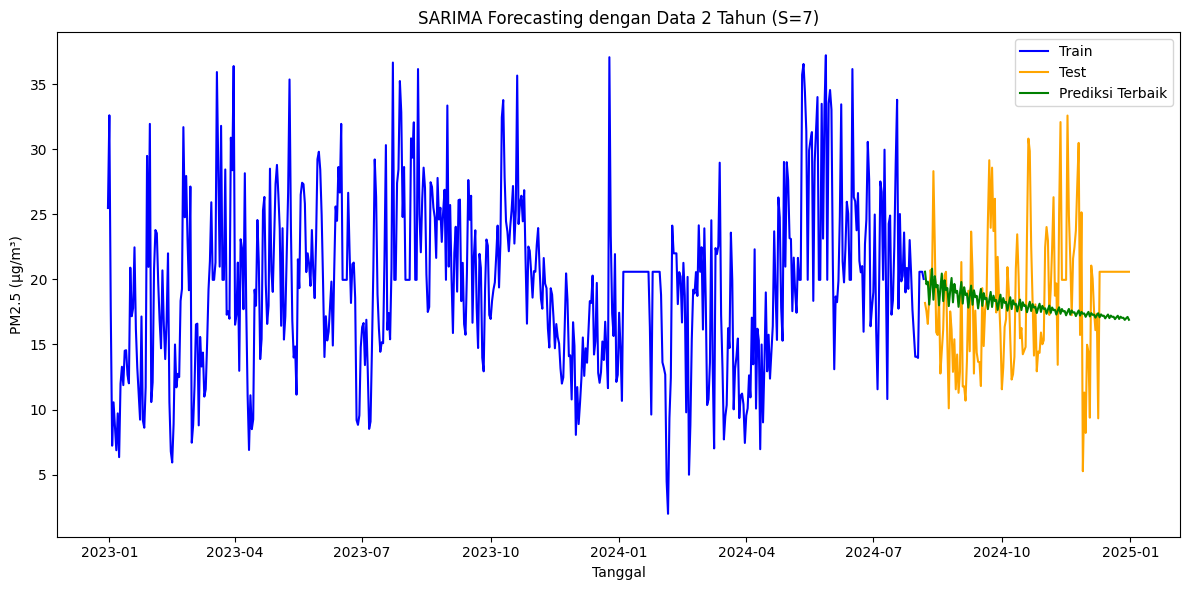

In [1]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0]
Q_LIST = [0, 1]
S_LIST = [7] # Musiman Seminngu

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=7)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 7) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61
SARIMA(0, 0, 0)(0, 0, 1, 7) - MAPE: 99.09%, MAE: 19.59, RMSE: 20.32
SARIMA(0, 0, 0)(1, 0, 0, 7) - MAPE: 56.06%, MAE: 11.21, RMSE: 12.91
SARIMA(0, 0, 0)(1, 0, 1, 7) - MAPE: 26.39%, MAE: 4.36, RMSE: 5.64
SARIMA(0, 0, 1)(0, 0, 0, 7) - MAPE: 99.75%, MAE: 19.78, RMSE: 20.56
SARIMA(0, 0, 1)(0, 0, 1, 7) - MAPE: 98.79%, MAE: 19.52, RMSE: 20.25
SARIMA(0, 0, 1)(1, 0, 0, 7) - MAPE: 73.48%, MAE: 14.38, RMSE: 15.70
SARIMA(0, 0, 1)(1, 0, 1, 7) - MAPE: 23.70%, MAE: 4.16, RMSE: 5.50
SARIMA(1, 0, 0)(0, 0, 0, 7) - MAPE: 85.12%, MAE: 16.47, RMSE: 17.54
SARIMA(1, 0, 0)(0, 0, 1, 7) - MAPE: 83.41%, MAE: 16.14, RMSE: 17.26
SARIMA(1, 0, 0)(1, 0, 0, 7) - MAPE: 83.20%, MAE: 16.09, RMSE: 17.23


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(1, 0, 1, 7) - MAPE: 23.52%, MAE: 4.21, RMSE: 5.48
SARIMA(1, 0, 1)(0, 0, 0, 7) - MAPE: 34.95%, MAE: 7.20, RMSE: 9.05
SARIMA(1, 0, 1)(0, 0, 1, 7) - MAPE: 28.24%, MAE: 5.56, RMSE: 6.94
SARIMA(1, 0, 1)(1, 0, 0, 7) - MAPE: 28.18%, MAE: 5.54, RMSE: 6.91


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)(1, 0, 1, 7) - MAPE: 27.09%, MAE: 4.46, RMSE: 5.48

Model SARIMA Terbaik: (1, 0, 0)(1, 0, 1, 7)
Final Model Evaluation - MAE: 4.21, RMSE: 5.48, MAPE: 23.52%


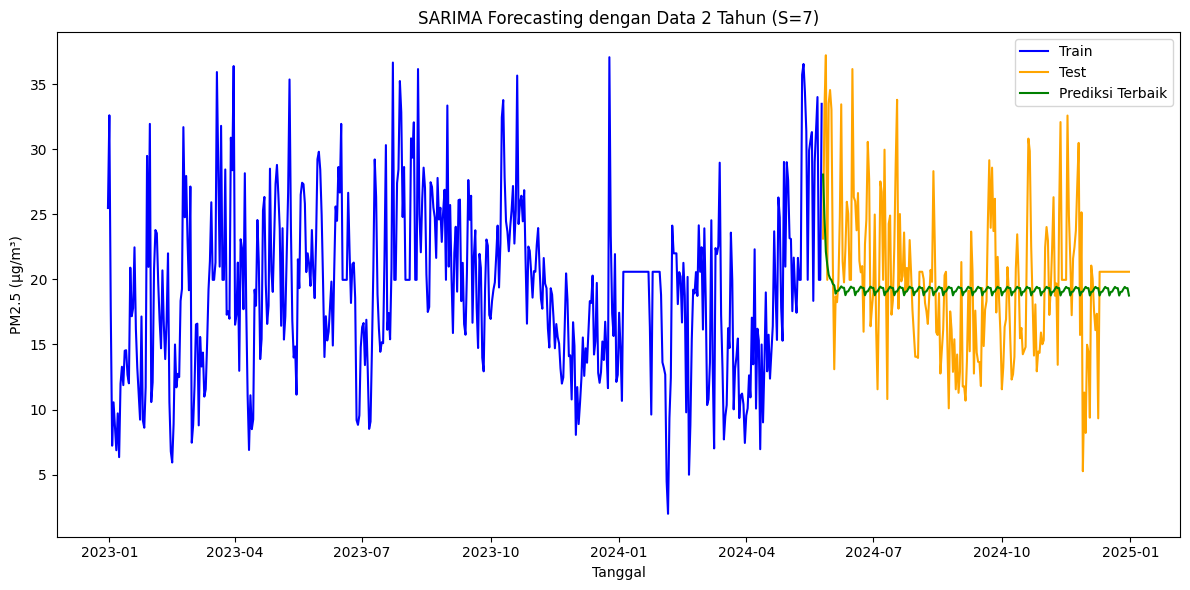

In [3]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0]
Q_LIST = [0, 1]
S_LIST = [7] # Musiman Seminngu

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=7)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 30) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 0, 1, 30) - MAPE: 89.00%, MAE: 16.79, RMSE: 18.10
SARIMA(0, 0, 0)(0, 1, 0, 30) - MAPE: 34.21%, MAE: 5.55, RMSE: 7.03
SARIMA(0, 0, 0)(0, 1, 1, 30) - MAPE: 25.99%, MAE: 4.02, RMSE: 5.04
SARIMA(0, 0, 0)(1, 0, 0, 30) - MAPE: 32.57%, MAE: 6.18, RMSE: 7.57
SARIMA(0, 0, 0)(1, 0, 1, 30) - MAPE: 26.24%, MAE: 4.07, RMSE: 5.09
SARIMA(0, 0, 0)(1, 1, 0, 30) - MAPE: 36.51%, MAE: 5.77, RMSE: 7.08
SARIMA(0, 0, 0)(1, 1, 1, 30) - MAPE: 25.99%, MAE: 4.03, RMSE: 5.04
SARIMA(0, 0, 1)(0, 0, 0, 30) - MAPE: 99.72%, MAE: 18.50, RMSE: 19.16
SARIMA(0, 0, 1)(0, 0, 1, 30) - MAPE: 90.80%, MAE: 17.09, RMSE: 18.20
SARIMA(0, 0, 1)(0, 1, 0, 30) - MAPE: 34.13%, MAE: 5.54, RMSE: 7.02
SARIMA(0, 0, 1)(0, 1, 1, 30) - MAPE: 26.33%, MAE: 4.06, RMSE: 5.08
SARIMA(0, 0, 1)(1, 0, 0, 30) - MAPE: 37.93%, MAE: 7.55, RMSE: 9.1

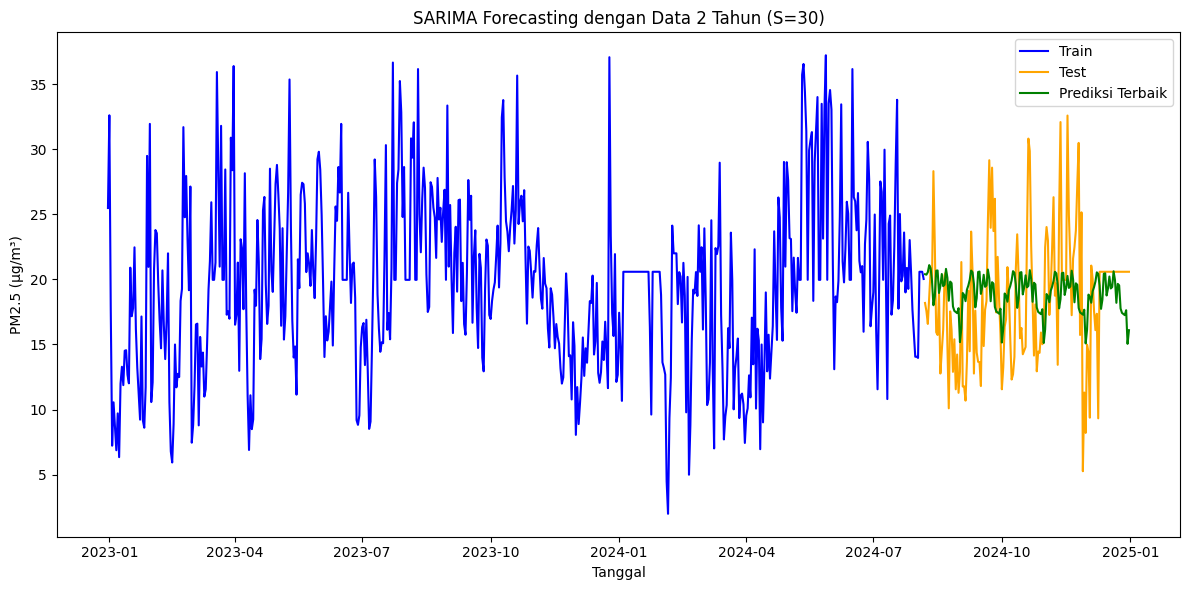

In [23]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [30] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=30)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 30) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61
SARIMA(0, 0, 0)(0, 0, 1, 30) - MAPE: 92.44%, MAE: 18.05, RMSE: 18.99
SARIMA(0, 0, 0)(1, 0, 0, 30) - MAPE: 32.41%, MAE: 6.48, RMSE: 7.93
SARIMA(0, 0, 0)(1, 0, 1, 30) - MAPE: 23.22%, MAE: 4.27, RMSE: 5.73
SARIMA(0, 0, 1)(0, 0, 0, 30) - MAPE: 99.75%, MAE: 19.78, RMSE: 20.56
SARIMA(0, 0, 1)(0, 0, 1, 30) - MAPE: 93.77%, MAE: 18.38, RMSE: 19.21
SARIMA(0, 0, 1)(1, 0, 0, 30) - MAPE: 38.98%, MAE: 8.08, RMSE: 9.85
SARIMA(0, 0, 1)(1, 0, 1, 30) - MAPE: 22.99%, MAE: 4.26, RMSE: 5.73
SARIMA(1, 0, 0)(0, 0, 0, 30) - MAPE: 85.12%, MAE: 16.47, RMSE: 17.54
SARIMA(1, 0, 0)(0, 0, 1, 30) - MAPE: 83.70%, MAE: 16.20, RMSE: 17.30
SARIMA(1, 0, 0)(1, 0, 0, 30) - MAPE: 83.39%, MAE: 16.14, RMSE: 17.25


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(1, 0, 1, 30) - MAPE: 22.44%, MAE: 4.34, RMSE: 5.70
SARIMA(1, 0, 1)(0, 0, 0, 30) - MAPE: 34.95%, MAE: 7.20, RMSE: 9.05
SARIMA(1, 0, 1)(0, 0, 1, 30) - MAPE: 29.66%, MAE: 6.05, RMSE: 7.64
SARIMA(1, 0, 1)(1, 0, 0, 30) - MAPE: 29.49%, MAE: 6.00, RMSE: 7.57
SARIMA(1, 0, 1)(1, 0, 1, 30) - MAPE: 31.76%, MAE: 6.60, RMSE: 8.33

Model SARIMA Terbaik: (1, 0, 0)(1, 0, 1, 30)
Final Model Evaluation - MAE: 4.34, RMSE: 5.70, MAPE: 22.44%


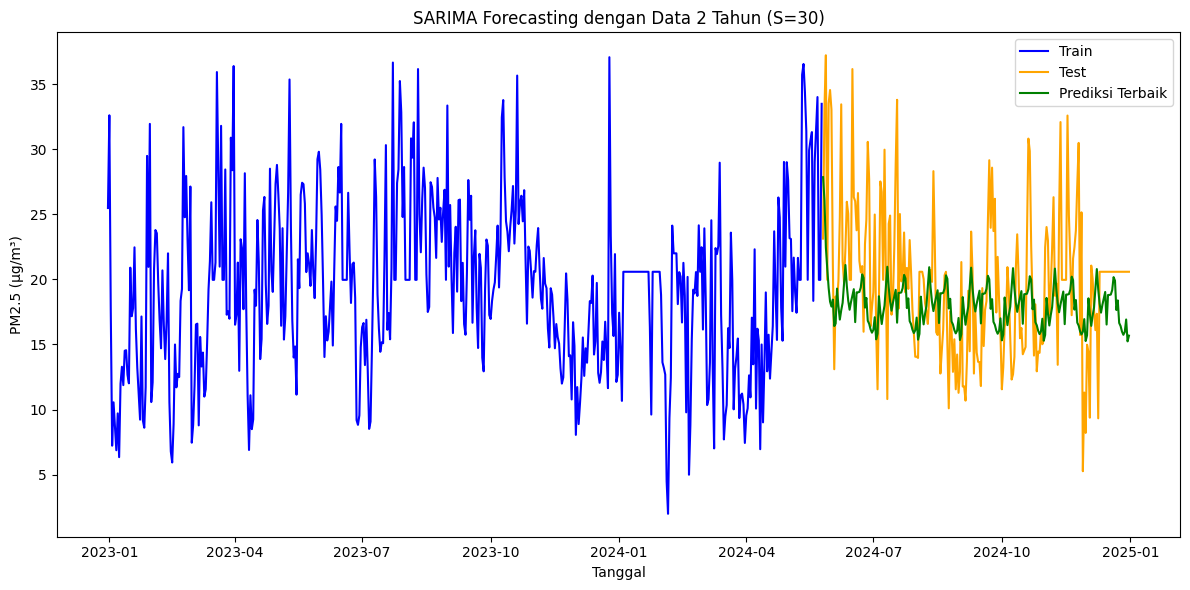

In [4]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0]
Q_LIST = [0, 1]
S_LIST = [30] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=30)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 60) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 0, 1, 60) - MAPE: 83.94%, MAE: 16.04, RMSE: 17.84
SARIMA(0, 0, 0)(0, 1, 0, 60) - MAPE: 41.65%, MAE: 6.68, RMSE: 8.22
SARIMA(0, 0, 0)(0, 1, 1, 60) - MAPE: 25.58%, MAE: 3.98, RMSE: 5.01
SARIMA(0, 0, 0)(1, 0, 0, 60) - MAPE: 33.42%, MAE: 5.77, RMSE: 7.15
SARIMA(0, 0, 0)(1, 0, 1, 60) - MAPE: 25.01%, MAE: 3.93, RMSE: 4.96
SARIMA(0, 0, 0)(1, 1, 0, 60) - MAPE: 36.21%, MAE: 5.57, RMSE: 6.94
SARIMA(0, 0, 0)(1, 1, 1, 60) - MAPE: 25.76%, MAE: 4.02, RMSE: 5.06
SARIMA(0, 0, 1)(0, 0, 0, 60) - MAPE: 99.72%, MAE: 18.50, RMSE: 19.16
SARIMA(0, 0, 1)(0, 0, 1, 60) - MAPE: 83.13%, MAE: 15.90, RMSE: 17.51
SARIMA(0, 0, 1)(0, 1, 0, 60) - MAPE: 41.38%, MAE: 6.63, RMSE: 8.14
SARIMA(0, 0, 1)(0, 1, 1, 60) - MAPE: 26.16%, MAE: 4.05, RMSE: 5.10
SARIMA(0, 0, 1)(1, 0, 0, 60) - MAPE: 32.70%, MAE: 6.02, RMSE: 7.4

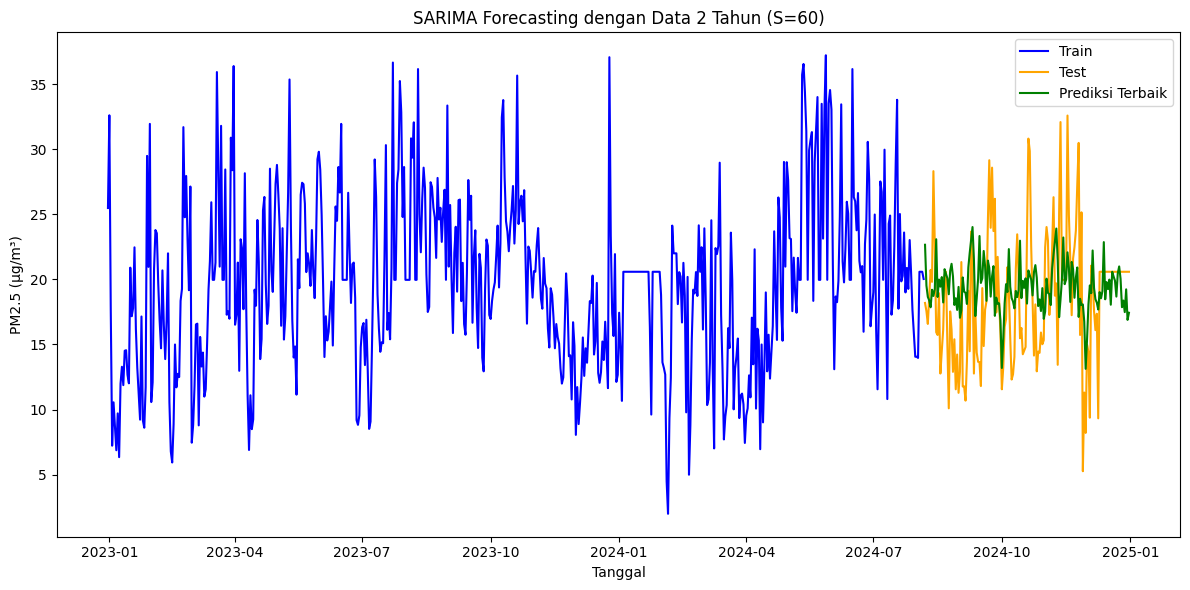

In [21]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [60] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=60)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 60) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61
SARIMA(0, 0, 0)(0, 0, 1, 60) - MAPE: 88.74%, MAE: 17.48, RMSE: 18.86
SARIMA(0, 0, 0)(1, 0, 0, 60) - MAPE: 39.46%, MAE: 7.90, RMSE: 9.65
SARIMA(0, 0, 0)(1, 0, 1, 60) - MAPE: 24.37%, MAE: 4.69, RMSE: 6.24
SARIMA(0, 0, 1)(0, 0, 0, 60) - MAPE: 99.75%, MAE: 19.78, RMSE: 20.56
SARIMA(0, 0, 1)(0, 0, 1, 60) - MAPE: 89.08%, MAE: 17.57, RMSE: 18.77
SARIMA(0, 0, 1)(1, 0, 0, 60) - MAPE: 41.35%, MAE: 8.47, RMSE: 10.22
SARIMA(0, 0, 1)(1, 0, 1, 60) - MAPE: 24.33%, MAE: 4.77, RMSE: 6.35
SARIMA(1, 0, 0)(0, 0, 0, 60) - MAPE: 85.12%, MAE: 16.47, RMSE: 17.54
SARIMA(1, 0, 0)(0, 0, 1, 60) - MAPE: 84.10%, MAE: 16.31, RMSE: 17.38
SARIMA(1, 0, 0)(1, 0, 0, 60) - MAPE: 83.41%, MAE: 16.20, RMSE: 17.26
SARIMA(1, 0, 0)(1, 0, 1, 60) - MAPE: 59.89%, MAE: 12.09, RMSE: 13.18
SARIMA(1, 0, 1)(0, 0, 0, 60) - MAPE: 34.95%, MAE: 7.20, 

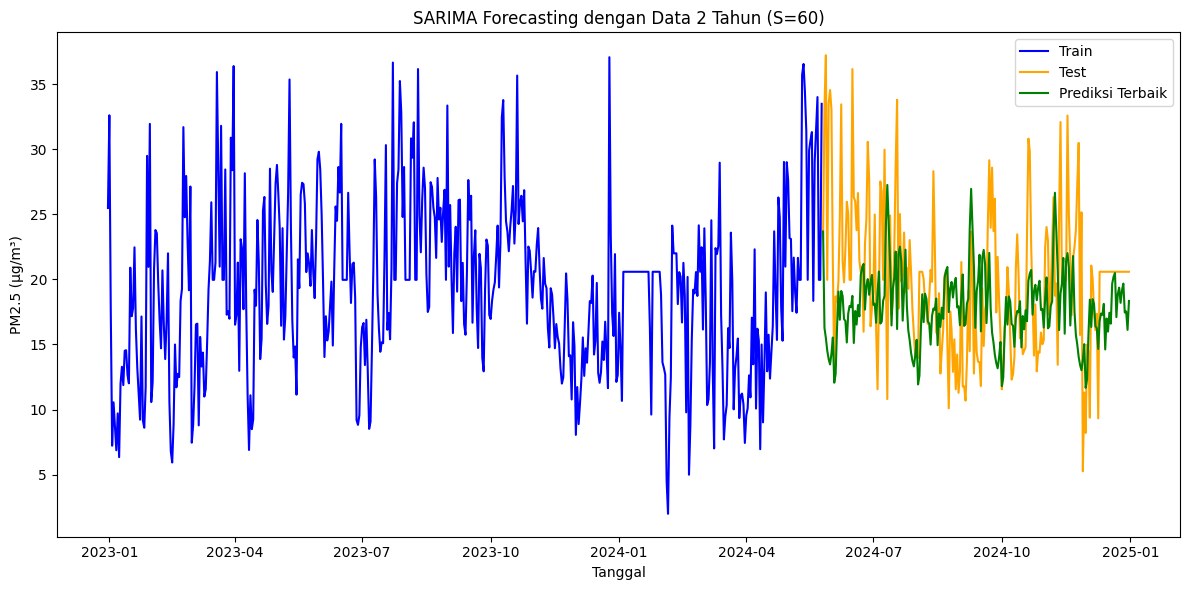

In [5]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0]
Q_LIST = [0, 1]
S_LIST = [60] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=60)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 90) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 0, 1, 90) - MAPE: 68.76%, MAE: 13.19, RMSE: 15.41
SARIMA(0, 0, 0)(0, 1, 0, 90) - MAPE: 48.29%, MAE: 7.42, RMSE: 9.60
SARIMA(0, 0, 0)(0, 1, 1, 90) - MAPE: 28.50%, MAE: 4.50, RMSE: 5.42
SARIMA(0, 0, 0)(1, 0, 0, 90) - MAPE: 38.55%, MAE: 6.06, RMSE: 7.82
SARIMA(0, 0, 0)(1, 0, 1, 90) - MAPE: 27.83%, MAE: 4.44, RMSE: 5.35
SARIMA(0, 0, 0)(1, 1, 0, 90) - MAPE: 36.82%, MAE: 5.75, RMSE: 7.16
SARIMA(0, 0, 0)(1, 1, 1, 90) - MAPE: 28.65%, MAE: 4.52, RMSE: 5.44
SARIMA(0, 0, 1)(0, 0, 0, 90) - MAPE: 99.72%, MAE: 18.50, RMSE: 19.16
SARIMA(0, 0, 1)(0, 0, 1, 90) - MAPE: 65.54%, MAE: 12.80, RMSE: 15.10
SARIMA(0, 0, 1)(0, 1, 0, 90) - MAPE: 48.24%, MAE: 7.41, RMSE: 9.60
SARIMA(0, 0, 1)(0, 1, 1, 90) - MAPE: 28.52%, MAE: 4.50, RMSE: 5.42
SARIMA(0, 0, 1)(1, 0, 0, 90) - MAPE: 35.14%, MAE: 5.76, RMSE: 7.2

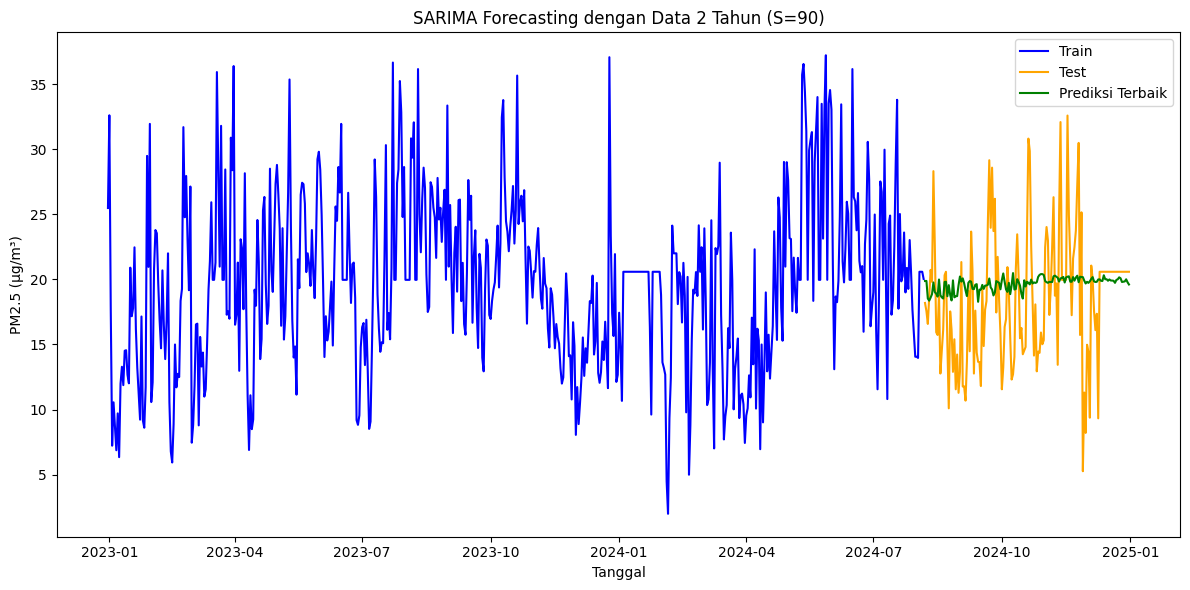

In [24]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [90] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=90)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 90) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61
SARIMA(0, 0, 0)(0, 0, 1, 90) - MAPE: 81.67%, MAE: 16.05, RMSE: 17.45
SARIMA(0, 0, 0)(1, 0, 0, 90) - MAPE: 38.19%, MAE: 7.73, RMSE: 9.40
SARIMA(0, 0, 0)(1, 0, 1, 90) - MAPE: 26.04%, MAE: 4.95, RMSE: 6.32
SARIMA(0, 0, 1)(0, 0, 0, 90) - MAPE: 99.75%, MAE: 19.78, RMSE: 20.56
SARIMA(0, 0, 1)(0, 0, 1, 90) - MAPE: 83.00%, MAE: 16.46, RMSE: 17.79
SARIMA(0, 0, 1)(1, 0, 0, 90) - MAPE: 40.69%, MAE: 8.36, RMSE: 10.08
SARIMA(0, 0, 1)(1, 0, 1, 90) - MAPE: 25.78%, MAE: 4.99, RMSE: 6.42
SARIMA(1, 0, 0)(0, 0, 0, 90) - MAPE: 85.12%, MAE: 16.47, RMSE: 17.54
SARIMA(1, 0, 0)(0, 0, 1, 90) - MAPE: 87.40%, MAE: 16.77, RMSE: 17.90
SARIMA(1, 0, 0)(1, 0, 0, 90) - MAPE: 86.87%, MAE: 16.67, RMSE: 17.79
SARIMA(1, 0, 0)(1, 0, 1, 90) - MAPE: 84.87%, MAE: 16.33, RMSE: 17.42
SARIMA(1, 0, 1)(0, 0, 0, 90) - MAPE: 34.95%, MAE: 7.20, 

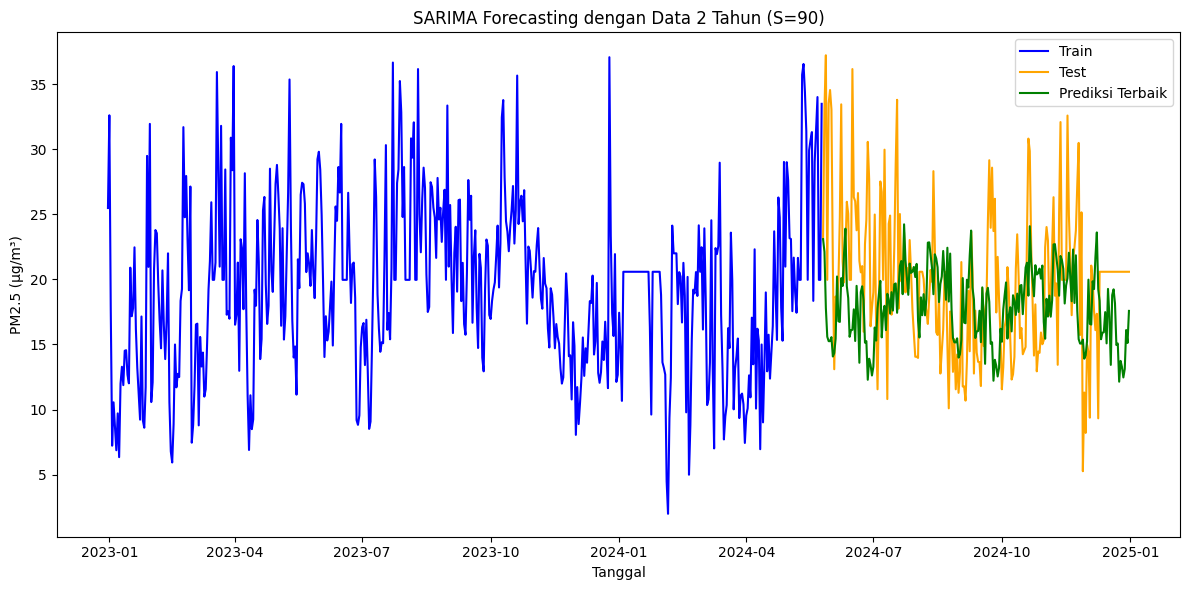

In [6]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0]
Q_LIST = [0, 1]
S_LIST = [90] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=90)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 146) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 0, 1, 146) - MAPE: 51.98%, MAE: 9.62, RMSE: 11.37
SARIMA(0, 0, 0)(0, 1, 0, 146) - MAPE: 38.96%, MAE: 6.27, RMSE: 8.12


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)(0, 1, 1, 146) - MAPE: 38.96%, MAE: 6.27, RMSE: 8.12
SARIMA(0, 0, 0)(1, 0, 0, 146) - MAPE: 35.31%, MAE: 5.89, RMSE: 7.31


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)(1, 0, 1, 146) - MAPE: 27.62%, MAE: 4.43, RMSE: 5.75
SARIMA(0, 0, 0)(1, 1, 0, 146) - MAPE: 27.88%, MAE: 4.63, RMSE: 5.91


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)(1, 1, 1, 146) - MAPE: 28.86%, MAE: 4.62, RMSE: 5.91
SARIMA(0, 0, 1)(0, 0, 0, 146) - MAPE: 99.72%, MAE: 18.50, RMSE: 19.16
SARIMA(0, 0, 1)(0, 0, 1, 146) - MAPE: 52.24%, MAE: 9.85, RMSE: 11.45
SARIMA(0, 0, 1)(0, 1, 0, 146) - MAPE: 39.23%, MAE: 6.32, RMSE: 8.14


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)(0, 1, 1, 146) - MAPE: 39.23%, MAE: 6.32, RMSE: 8.14
SARIMA(0, 0, 1)(1, 0, 0, 146) - MAPE: 34.18%, MAE: 5.92, RMSE: 7.14


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)(1, 0, 1, 146) - MAPE: 26.70%, MAE: 4.35, RMSE: 5.67
SARIMA(0, 0, 1)(1, 1, 0, 146) - MAPE: 27.81%, MAE: 4.60, RMSE: 5.87


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 1)(1, 1, 1, 146) - MAPE: 28.54%, MAE: 4.55, RMSE: 5.84
SARIMA(0, 1, 0)(0, 0, 0, 146) - MAPE: 26.75%, MAE: 4.00, RMSE: 5.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)(0, 0, 1, 146) - MAPE: 26.75%, MAE: 4.00, RMSE: 5.16
SARIMA(0, 1, 0)(0, 1, 0, 146) - MAPE: 49.51%, MAE: 9.08, RMSE: 10.53


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)(0, 1, 1, 146) - MAPE: 31.08%, MAE: 5.97, RMSE: 7.44
SARIMA(0, 1, 0)(1, 0, 0, 146) - MAPE: 31.08%, MAE: 4.56, RMSE: 5.78


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)(1, 0, 1, 146) - MAPE: 45.99%, MAE: 8.45, RMSE: 9.81
SARIMA(0, 1, 0)(1, 1, 0, 146) - MAPE: 36.91%, MAE: 7.14, RMSE: 8.72


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)(1, 1, 1, 146) - MAPE: 30.55%, MAE: 5.90, RMSE: 7.41
SARIMA(0, 1, 1)(0, 0, 0, 146) - MAPE: 26.06%, MAE: 3.96, RMSE: 5.06


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)(0, 0, 1, 146) - MAPE: 26.90%, MAE: 4.01, RMSE: 5.18
SARIMA(0, 1, 1)(0, 1, 0, 146) - MAPE: 38.97%, MAE: 6.78, RMSE: 8.16


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)(0, 1, 1, 146) - MAPE: 27.38%, MAE: 5.01, RMSE: 6.37
SARIMA(0, 1, 1)(1, 0, 0, 146) - MAPE: 27.43%, MAE: 4.12, RMSE: 5.33


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)(1, 0, 1, 146) - MAPE: 37.43%, MAE: 6.68, RMSE: 7.95
SARIMA(0, 1, 1)(1, 1, 0, 146) - MAPE: 29.20%, MAE: 5.55, RMSE: 7.10


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)(1, 1, 1, 146) - MAPE: 26.93%, MAE: 4.99, RMSE: 6.38
SARIMA(1, 0, 0)(0, 0, 0, 146) - MAPE: 80.90%, MAE: 15.41, RMSE: 16.99
SARIMA(1, 0, 0)(0, 0, 1, 146) - MAPE: 87.82%, MAE: 16.66, RMSE: 18.55
SARIMA(1, 0, 0)(0, 1, 0, 146) - MAPE: 39.58%, MAE: 6.39, RMSE: 8.20


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(0, 1, 1, 146) - MAPE: 39.58%, MAE: 6.39, RMSE: 8.21
SARIMA(1, 0, 0)(1, 0, 0, 146) - MAPE: 87.40%, MAE: 16.59, RMSE: 18.47


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)(1, 0, 1, 146) - MAPE: 87.00%, MAE: 16.52, RMSE: 18.39
SARIMA(1, 0, 0)(1, 1, 0, 146) - MAPE: 27.84%, MAE: 4.59, RMSE: 5.87


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)(1, 1, 1, 146) - MAPE: 28.33%, MAE: 4.49, RMSE: 5.82
SARIMA(1, 0, 1)(0, 0, 0, 146) - MAPE: 35.43%, MAE: 7.10, RMSE: 8.78
SARIMA(1, 0, 1)(0, 0, 1, 146) - MAPE: 35.85%, MAE: 7.05, RMSE: 8.59
SARIMA(1, 0, 1)(0, 1, 0, 146) - MAPE: 39.70%, MAE: 6.41, RMSE: 8.24
SARIMA(1, 0, 1)(0, 1, 1, 146) - MAPE: 39.69%, MAE: 6.41, RMSE: 8.24
SARIMA(1, 0, 1)(1, 0, 0, 146) - MAPE: 35.97%, MAE: 7.08, RMSE: 8.63


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)(1, 0, 1, 146) - MAPE: 35.99%, MAE: 7.09, RMSE: 8.64
SARIMA(1, 0, 1)(1, 1, 0, 146) - MAPE: 28.00%, MAE: 4.61, RMSE: 5.88


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)(1, 1, 1, 146) - MAPE: 28.28%, MAE: 4.49, RMSE: 5.81
SARIMA(1, 1, 0)(0, 0, 0, 146) - MAPE: 27.01%, MAE: 4.02, RMSE: 5.20


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)(0, 0, 1, 146) - MAPE: 27.01%, MAE: 4.02, RMSE: 5.20
SARIMA(1, 1, 0)(0, 1, 0, 146) - MAPE: 45.00%, MAE: 8.14, RMSE: 9.52


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)(0, 1, 1, 146) - MAPE: 29.09%, MAE: 5.48, RMSE: 6.90
SARIMA(1, 1, 0)(1, 0, 0, 146) - MAPE: 30.23%, MAE: 4.44, RMSE: 5.67


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)(1, 0, 1, 146) - MAPE: 40.57%, MAE: 7.35, RMSE: 8.63
SARIMA(1, 1, 0)(1, 1, 0, 146) - MAPE: 33.05%, MAE: 6.36, RMSE: 7.92


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)(1, 1, 1, 146) - MAPE: 28.55%, MAE: 5.42, RMSE: 6.87
SARIMA(1, 1, 1)(0, 0, 0, 146) - MAPE: 26.41%, MAE: 3.98, RMSE: 5.11
SARIMA(1, 1, 1)(0, 0, 1, 146) - MAPE: 25.68%, MAE: 3.95, RMSE: 5.02
SARIMA(1, 1, 1)(0, 1, 0, 146) - MAPE: 41.92%, MAE: 6.66, RMSE: 8.58


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)(0, 1, 1, 146) - MAPE: 28.50%, MAE: 4.53, RMSE: 5.87
SARIMA(1, 1, 1)(1, 0, 0, 146) - MAPE: 26.85%, MAE: 4.10, RMSE: 5.25


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)(1, 0, 1, 146) - MAPE: 27.16%, MAE: 4.17, RMSE: 5.32
SARIMA(1, 1, 1)(1, 1, 0, 146) - MAPE: 26.50%, MAE: 4.52, RMSE: 5.88


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)(1, 1, 1, 146) - MAPE: 27.08%, MAE: 4.38, RMSE: 5.71

Model SARIMA Terbaik: (1, 1, 1)(0, 0, 1, 146)
Final Model Evaluation - MAE: 3.95, RMSE: 5.02, MAPE: 25.68%


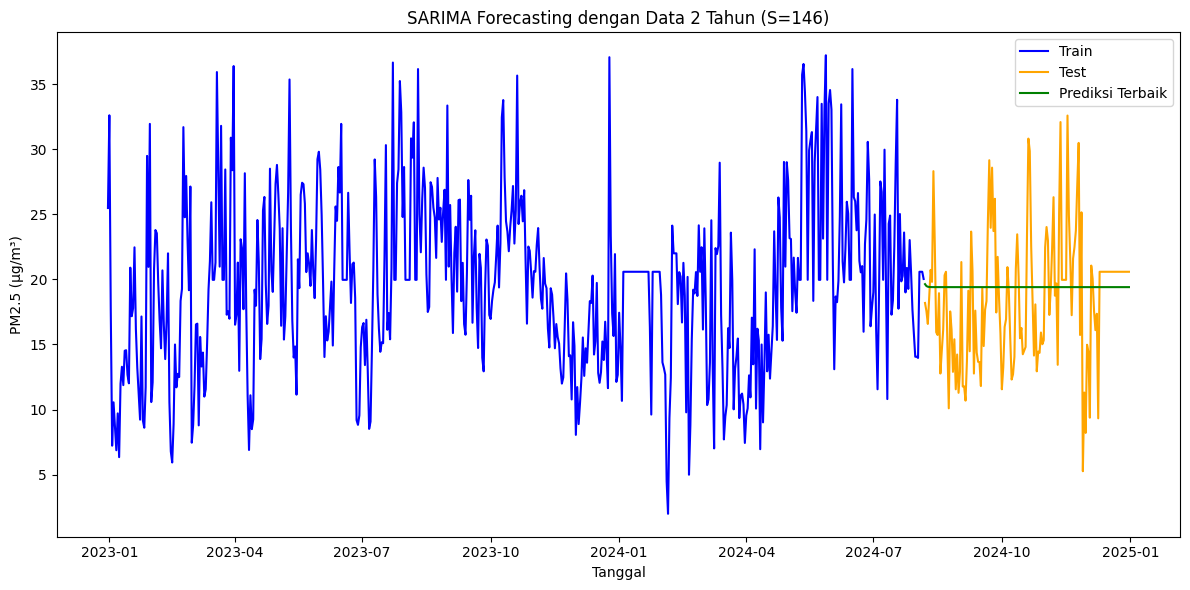

In [1]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [146] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=146)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 146) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61
SARIMA(0, 0, 0)(0, 0, 1, 146) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61
SARIMA(0, 0, 0)(0, 1, 0, 146) - MAPE: 34.98%, MAE: 6.51, RMSE: 8.43


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(0, 1, 1, 146) - MAPE: 27.77%, MAE: 4.93, RMSE: 6.24
SARIMA(0, 0, 0)(1, 0, 0, 146) - MAPE: 34.79%, MAE: 6.95, RMSE: 8.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)(1, 0, 1, 146) - MAPE: 138.14%, MAE: 26.52, RMSE: 31.06
SARIMA(0, 0, 0)(1, 1, 0, 146) - MAPE: 26.77%, MAE: 4.92, RMSE: 6.29


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(1, 1, 1, 146) - MAPE: 27.37%, MAE: 4.85, RMSE: 6.12
SARIMA(0, 0, 1)(0, 0, 0, 146) - MAPE: 99.75%, MAE: 19.78, RMSE: 20.56


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)(0, 0, 1, 146) - MAPE: 100.15%, MAE: 19.87, RMSE: 20.65
SARIMA(0, 0, 1)(0, 1, 0, 146) - MAPE: 34.80%, MAE: 6.47, RMSE: 8.41


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 1)(0, 1, 1, 146) - MAPE: 27.74%, MAE: 4.92, RMSE: 6.24
SARIMA(0, 0, 1)(1, 0, 0, 146) - MAPE: 37.43%, MAE: 7.72, RMSE: 9.53


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)(1, 0, 1, 146) - MAPE: 34.24%, MAE: 6.69, RMSE: 8.60
SARIMA(0, 0, 1)(1, 1, 0, 146) - MAPE: 26.72%, MAE: 4.91, RMSE: 6.30


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 1)(1, 1, 1, 146) - MAPE: 27.53%, MAE: 4.87, RMSE: 6.16
SARIMA(0, 1, 0)(0, 0, 0, 146) - MAPE: 83.97%, MAE: 13.71, RMSE: 14.73


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)(0, 0, 1, 146) - MAPE: 83.97%, MAE: 13.71, RMSE: 14.73
SARIMA(0, 1, 0)(0, 1, 0, 146) - MAPE: 153.16%, MAE: 26.29, RMSE: 29.15


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)(0, 1, 1, 146) - MAPE: 77.96%, MAE: 12.71, RMSE: 14.15
SARIMA(0, 1, 0)(1, 0, 0, 146) - MAPE: 76.67%, MAE: 12.40, RMSE: 13.52
SARIMA(0, 1, 0)(1, 0, 1, 146) - MAPE: 145.68%, MAE: 24.94, RMSE: 27.41
SARIMA(0, 1, 0)(1, 1, 0, 146) - MAPE: 78.09%, MAE: 12.82, RMSE: 14.40


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)(1, 1, 1, 146) - MAPE: 74.73%, MAE: 12.14, RMSE: 13.57
SARIMA(0, 1, 1)(0, 0, 0, 146) - MAPE: 55.35%, MAE: 8.77, RMSE: 9.81


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)(0, 0, 1, 146) - MAPE: 61.03%, MAE: 9.73, RMSE: 10.77
SARIMA(0, 1, 1)(0, 1, 0, 146) - MAPE: 95.79%, MAE: 15.99, RMSE: 18.60


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)(0, 1, 1, 146) - MAPE: 54.13%, MAE: 8.67, RMSE: 10.05
SARIMA(0, 1, 1)(1, 0, 0, 146) - MAPE: 51.59%, MAE: 8.13, RMSE: 9.24


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)(1, 0, 1, 146) - MAPE: 107.73%, MAE: 18.09, RMSE: 20.47
SARIMA(0, 1, 1)(1, 1, 0, 146) - MAPE: 49.21%, MAE: 7.99, RMSE: 9.31


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)(1, 1, 1, 146) - MAPE: 54.34%, MAE: 8.70, RMSE: 10.09
SARIMA(1, 0, 0)(0, 0, 0, 146) - MAPE: 85.12%, MAE: 16.47, RMSE: 17.54


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(0, 0, 1, 146) - MAPE: 85.68%, MAE: 16.58, RMSE: 17.64
SARIMA(1, 0, 0)(0, 1, 0, 146) - MAPE: 34.78%, MAE: 6.42, RMSE: 8.22


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 0)(0, 1, 1, 146) - MAPE: 27.71%, MAE: 4.90, RMSE: 6.17
SARIMA(1, 0, 0)(1, 0, 0, 146) - MAPE: 90.25%, MAE: 17.35, RMSE: 18.53


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(1, 0, 1, 146) - MAPE: 133.55%, MAE: 25.29, RMSE: 28.18
SARIMA(1, 0, 0)(1, 1, 0, 146) - MAPE: 26.70%, MAE: 4.88, RMSE: 6.23


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 0)(1, 1, 1, 146) - MAPE: 27.76%, MAE: 4.90, RMSE: 6.17
SARIMA(1, 0, 1)(0, 0, 0, 146) - MAPE: 34.95%, MAE: 7.20, RMSE: 9.05


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)(0, 0, 1, 146) - MAPE: 60.59%, MAE: 11.95, RMSE: 13.64
SARIMA(1, 0, 1)(0, 1, 0, 146) - MAPE: 35.10%, MAE: 6.44, RMSE: 8.16


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 1)(0, 1, 1, 146) - MAPE: 27.76%, MAE: 4.90, RMSE: 6.16
SARIMA(1, 0, 1)(1, 0, 0, 146) - MAPE: 34.64%, MAE: 7.06, RMSE: 8.88


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)(1, 0, 1, 146) - MAPE: 113.81%, MAE: 21.63, RMSE: 24.18
SARIMA(1, 0, 1)(1, 1, 0, 146) - MAPE: 26.77%, MAE: 4.89, RMSE: 6.22


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 1)(1, 1, 1, 146) - MAPE: 27.76%, MAE: 4.89, RMSE: 6.16
SARIMA(1, 1, 0)(0, 0, 0, 146) - MAPE: 68.21%, MAE: 10.95, RMSE: 12.00


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)(0, 0, 1, 146) - MAPE: 68.22%, MAE: 10.95, RMSE: 12.00
SARIMA(1, 1, 0)(0, 1, 0, 146) - MAPE: 131.77%, MAE: 22.42, RMSE: 25.20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)(0, 1, 1, 146) - MAPE: 61.86%, MAE: 9.95, RMSE: 11.36
SARIMA(1, 1, 0)(1, 0, 0, 146) - MAPE: 62.43%, MAE: 9.95, RMSE: 11.06


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)(1, 0, 1, 146) - MAPE: 124.67%, MAE: 21.13, RMSE: 23.55
SARIMA(1, 1, 0)(1, 1, 0, 146) - MAPE: 62.45%, MAE: 10.14, RMSE: 11.63


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)(1, 1, 1, 146) - MAPE: 59.59%, MAE: 9.57, RMSE: 10.96
SARIMA(1, 1, 1)(0, 0, 0, 146) - MAPE: 48.16%, MAE: 7.58, RMSE: 8.63


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)(0, 0, 1, 146) - MAPE: 60.82%, MAE: 9.69, RMSE: 10.74
SARIMA(1, 1, 1)(0, 1, 0, 146) - MAPE: 74.16%, MAE: 12.26, RMSE: 14.60


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)(0, 1, 1, 146) - MAPE: 54.24%, MAE: 8.68, RMSE: 10.08
SARIMA(1, 1, 1)(1, 0, 0, 146) - MAPE: 46.42%, MAE: 7.28, RMSE: 8.40


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)(1, 0, 1, 146) - MAPE: 97.55%, MAE: 16.28, RMSE: 18.61
SARIMA(1, 1, 1)(1, 1, 0, 146) - MAPE: 45.50%, MAE: 7.41, RMSE: 8.65


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)(1, 1, 1, 146) - MAPE: 53.34%, MAE: 8.53, RMSE: 9.91

Model SARIMA Terbaik: (1, 0, 0)(1, 1, 0, 146)
Final Model Evaluation - MAE: 4.88, RMSE: 6.23, MAPE: 26.70%


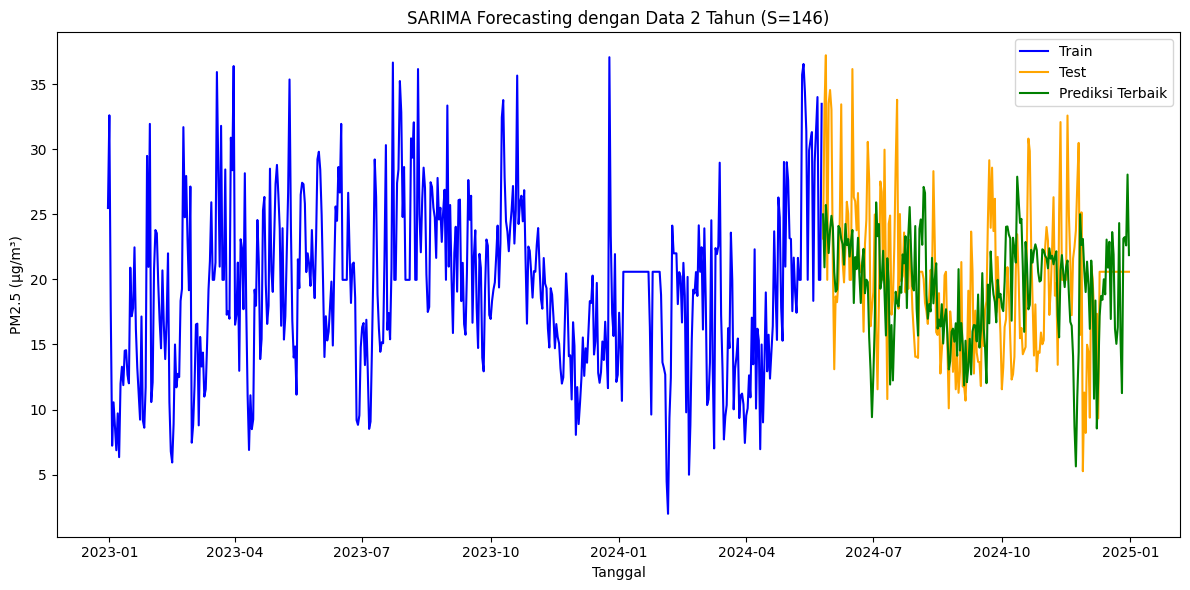

In [10]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [146] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=146)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 180) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 0, 1, 180) - MAPE: 100.00%, MAE: 18.55, RMSE: 19.20
SARIMA(0, 0, 0)(0, 1, 0, 180) - MAPE: 37.49%, MAE: 6.12, RMSE: 7.85
SARIMA(0, 0, 0)(0, 1, 1, 180) - MAPE: 28.43%, MAE: 4.54, RMSE: 5.61
SARIMA(0, 0, 0)(1, 0, 0, 180) - MAPE: 33.16%, MAE: 5.59, RMSE: 7.14
SARIMA(0, 0, 0)(1, 0, 1, 180) - MAPE: 211.60%, MAE: 37.98, RMSE: 39.15
SARIMA(0, 0, 0)(1, 1, 0, 180) - MAPE: 29.91%, MAE: 4.79, RMSE: 5.96
SARIMA(0, 0, 0)(1, 1, 1, 180) - MAPE: 29.48%, MAE: 4.71, RMSE: 5.83
SARIMA(0, 0, 1)(0, 0, 0, 180) - MAPE: 99.72%, MAE: 18.50, RMSE: 19.16
SARIMA(0, 0, 1)(0, 0, 1, 180) - MAPE: 100.10%, MAE: 18.57, RMSE: 19.22
SARIMA(0, 0, 1)(0, 1, 0, 180) - MAPE: 37.37%, MAE: 6.10, RMSE: 7.84
SARIMA(0, 0, 1)(0, 1, 1, 180) - MAPE: 27.97%, MAE: 4.45, RMSE: 5.58
SARIMA(0, 0, 1)(1, 0, 0, 180) - MAPE: 31.77%, MA

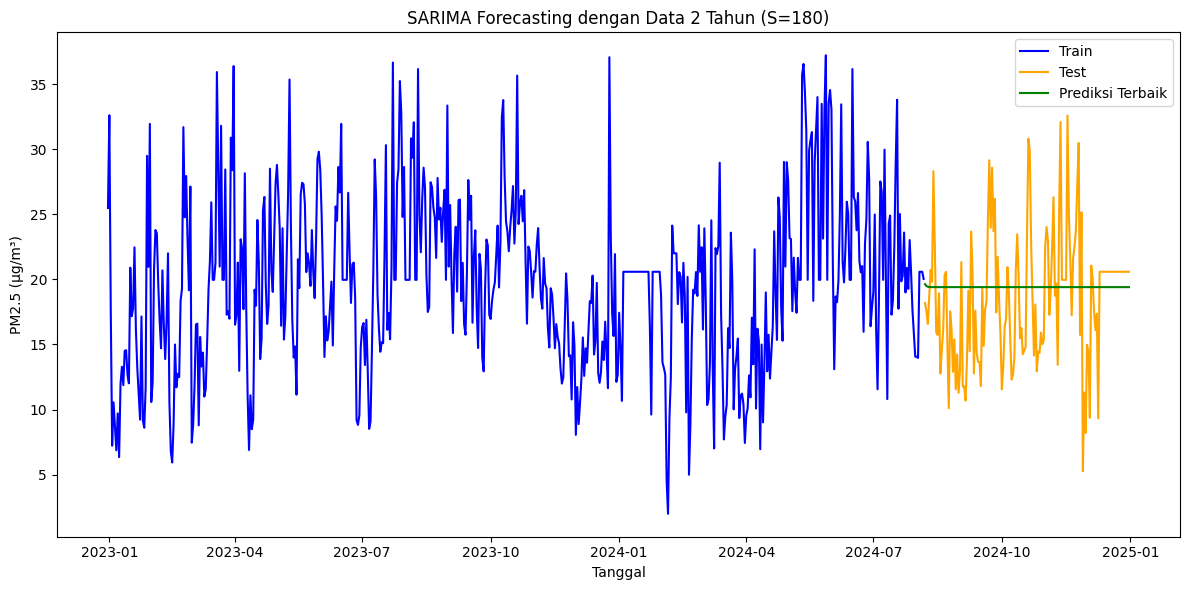

In [25]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [180] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=180)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2022-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 732
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 180) - MAPE: 100.00%, MAE: 19.84, RMSE: 20.61


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(0, 0, 1, 180) - MAPE: 71.54%, MAE: 14.39, RMSE: 16.24
SARIMA(0, 0, 0)(1, 0, 0, 180) - MAPE: 34.14%, MAE: 7.07, RMSE: 8.92


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)(1, 0, 1, 180) - MAPE: 34.94%, MAE: 7.24, RMSE: 9.10
SARIMA(0, 0, 1)(0, 0, 0, 180) - MAPE: 99.75%, MAE: 19.78, RMSE: 20.56


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 1)(0, 0, 1, 180) - MAPE: 71.13%, MAE: 14.29, RMSE: 16.13
SARIMA(0, 0, 1)(1, 0, 0, 180) - MAPE: 36.34%, MAE: 7.64, RMSE: 9.50


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 1)(1, 0, 1, 180) - MAPE: 28.25%, MAE: 5.94, RMSE: 7.78
SARIMA(1, 0, 0)(0, 0, 0, 180) - MAPE: 85.12%, MAE: 16.47, RMSE: 17.54


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 0)(0, 0, 1, 180) - MAPE: 78.83%, MAE: 15.38, RMSE: 16.40
SARIMA(1, 0, 0)(1, 0, 0, 180) - MAPE: 78.79%, MAE: 15.38, RMSE: 16.40


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 0)(1, 0, 1, 180) - MAPE: 79.52%, MAE: 15.46, RMSE: 16.54
SARIMA(1, 0, 1)(0, 0, 0, 180) - MAPE: 34.95%, MAE: 7.20, RMSE: 9.05


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 1)(0, 0, 1, 180) - MAPE: 35.28%, MAE: 7.27, RMSE: 9.09
SARIMA(1, 0, 1)(1, 0, 0, 180) - MAPE: 35.25%, MAE: 7.27, RMSE: 9.09


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 0, 1)(1, 0, 1, 180) - MAPE: 35.52%, MAE: 7.31, RMSE: 9.10

Model SARIMA Terbaik: (0, 0, 1)(1, 0, 1, 180)
Final Model Evaluation - MAE: 5.94, RMSE: 7.78, MAPE: 28.25%


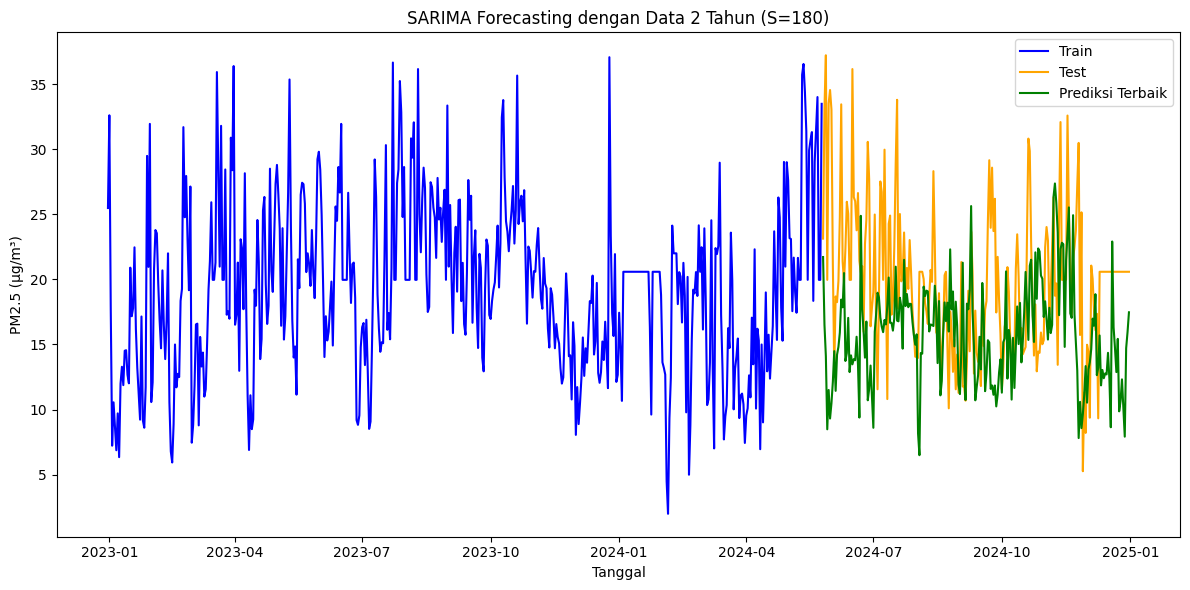

In [1]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0]
Q_LIST = [0, 1]
S_LIST = [180] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=180)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=1)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [360] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=365)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

Data dipotong dari 2023-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 367
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 360) - MAPE: 100.00%, MAE: 19.73, RMSE: 20.37


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(0, 0, 1, 360) - MAPE: 96.19%, MAE: 18.96, RMSE: 19.77
SARIMA(0, 0, 0)(0, 1, 0, 360) - MAPE: 92.23%, MAE: 18.17, RMSE: 19.47


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(0, 1, 1, 360) - MAPE: 92.23%, MAE: 18.17, RMSE: 19.47


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(1, 0, 0, 360) - MAPE: 106.02%, MAE: 20.94, RMSE: 21.91


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)(1, 0, 1, 360) - MAPE: 99.98%, MAE: 19.73, RMSE: 20.37


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_numdiff.py:487: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
/usr/local/lib/python

20:47:35 - cmdstanpy - INFO - Chain [1] start processing
20:47:35 - cmdstanpy - INFO - Chain [1] done processing


--- Memulai Pelatihan Model Prophet ---
--- Pelatihan Model Prophet Selesai ---

FINAL MODEL EVALUATION PROPHET
MAE: 6.11
RMSE: 7.17
MAPE: 37.96%


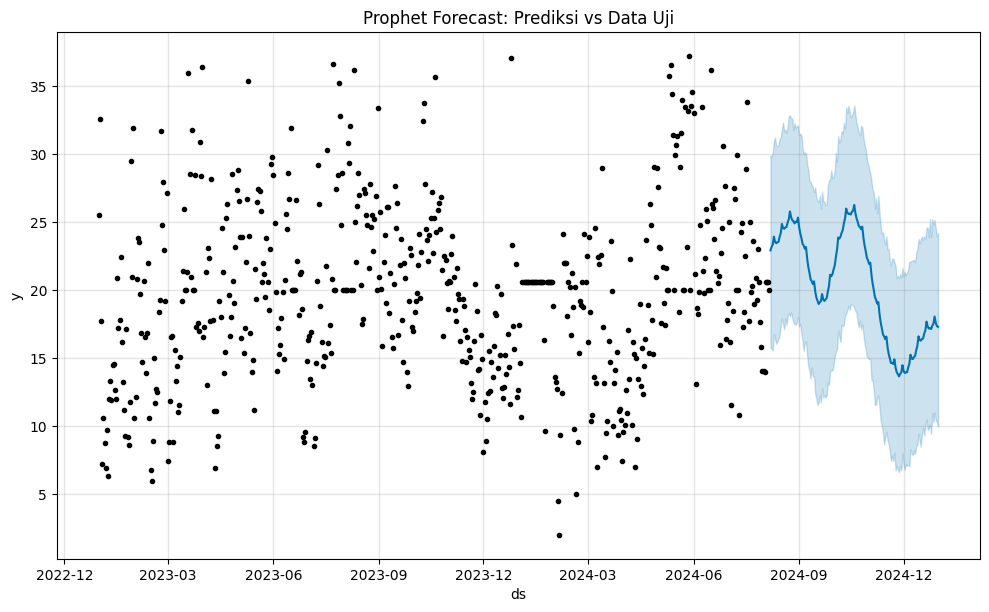

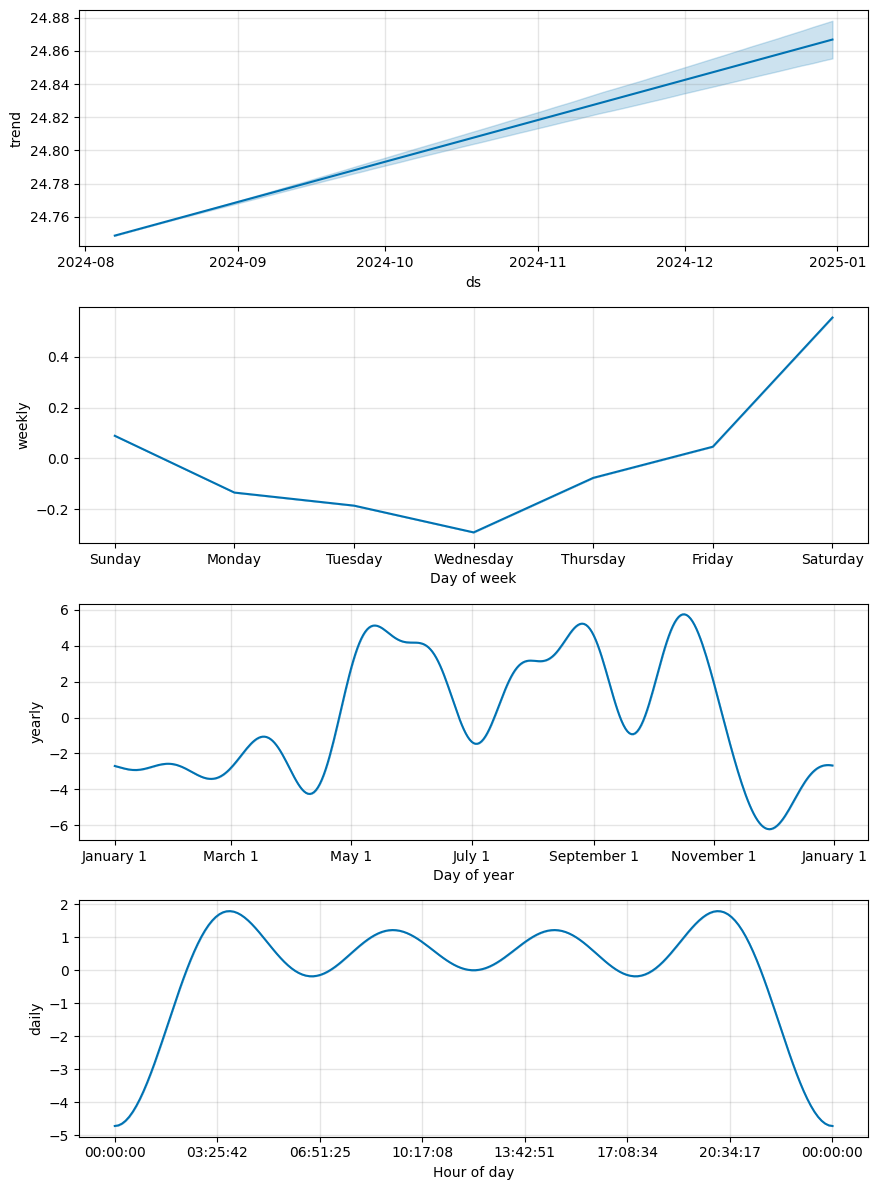

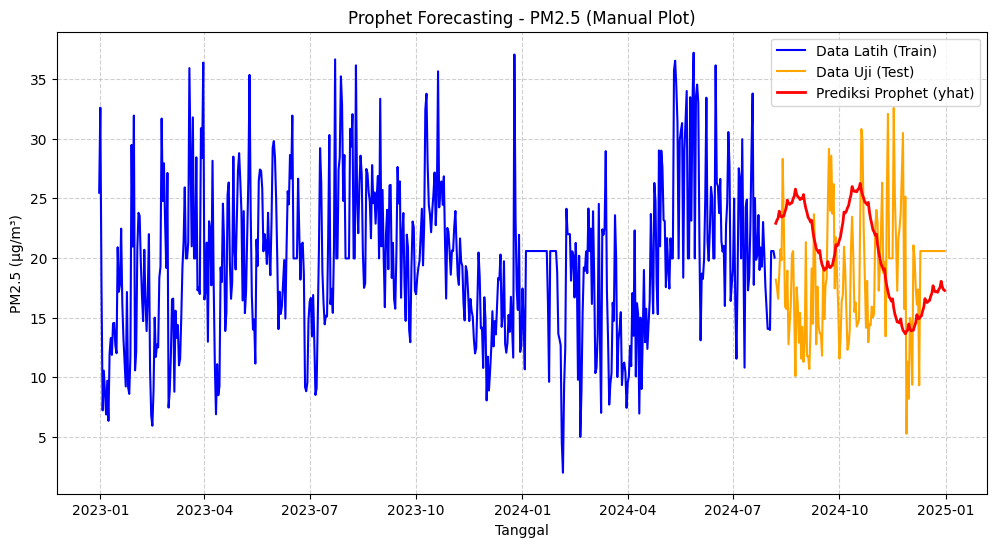

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
# Pastikan pustaka Prophet sudah terinstal: pip install prophet
from prophet import Prophet 

# --- 1. MUAT DATA DAN PRE-PROSESING (Konsisten dengan ARIMA) ---

# Ganti 'data_pm.xlsx - Sheet1.csv' dengan path file Anda yang benar jika berbeda
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# Potong data ke 2 tahun terakhir (Konsisten dengan ARIMA)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=2)
df_sliced = df[df.index >= start_date].copy()

# Re-index dan Imputasi KNN
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                            columns=df_numeric.columns, 
                            index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# Penanganan Outlier (Ganti dengan Median)
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 
y = y_clean 

# --- 2. PENYESUAIAN DATA UNTUK PROPHET ---
# Prophet membutuhkan dataframe dengan kolom 'ds' (datestamp) dan 'y' (value)
df_prophet = y.reset_index().rename(columns={'Tanggal': 'ds', 'PM2.5': 'y'})

# --- 3. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.8
split = int(len(df_prophet) * TRAIN_RATIO)
df_train = df_prophet[:split]
df_test = df_prophet[split:]

# --- 4. PELATIHAN MODEL PROPHET ---
print("--- Memulai Pelatihan Model Prophet ---")

# Inisialisasi model Prophet
model_prophet = Prophet(
    daily_seasonality=True, 
    weekly_seasonality=True, 
    yearly_seasonality=True,
    # Tambahkan parameter lain jika diperlukan, misal changepoint_prior_scale=0.05
)

# Latih model
model_prophet.fit(df_train)
print("--- Pelatihan Model Prophet Selesai ---")

# --- 5. PREDIKSI (Kode yang Diperbaiki) ---

future = df_test[['ds']] 
forecast = model_prophet.predict(future)

# AMBIL NILAI PREDIKSI SEBAGAI SALINAN INDEPENDEN DENGAN .copy()
# Ini adalah perbaikan utama untuk menghilangkan peringatan
y_pred_prophet = forecast['yhat'].copy() 

y_true_prophet = df_test['y']

# Mengoreksi prediksi negatif (operasi ini sekarang aman dilakukan pada salinan)
y_pred_prophet[y_pred_prophet < 0] = 0 

# --- 6. FUNGSI EVALUASI ---
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    
    # 1. Mengonversi ke numpy array (lebih aman untuk operasi matematis)
    y_true_np = y_true.values if isinstance(y_true, pd.Series) else np.array(y_true)
    y_pred_np = y_pred.values if isinstance(y_pred, pd.Series) else np.array(y_pred)
    
    # 2. Mengganti nilai 0 pada y_true dengan epsilon (angka terkecil)
    # Ini mencegah pembagian dengan nol.
    y_true_safe = np.where(y_true_np == 0, np.finfo(float).eps, y_true_np)
    
    # 3. Hitung Absolute Percentage Error (APE)
    ape = np.abs((y_true_np - y_pred_np) / y_true_safe)
    
    # 4. Gunakan np.nanmean untuk menghitung rata-rata APE, 
    #    mengabaikan nilai NaN yang mungkin masih muncul.
    mape = np.nanmean(ape) * 100
    
    return mae, mse, rmse, mape

# --- 7. EVALUASI AKHIR MODEL PROPHET ---
mae, mse, rmse, mape = evaluate_model(y_true_prophet, y_pred_prophet)

print("\n" + "="*50)
print("FINAL MODEL EVALUATION PROPHET")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("="*50)

# --- 8. VISUALISASI HASIL PREDIKSI ---

# 8a. Visualisasi menggunakan fungsi plot bawaan Prophet
fig1 = model_prophet.plot(forecast)
plt.title('Prophet Forecast: Prediksi vs Data Uji')

# 8b. Visualisasi komponen (opsional, untuk analisis)
fig2 = model_prophet.plot_components(forecast)
plt.show()

# 8c. Visualisasi manual (untuk perbandingan langsung dengan ARIMA)
plt.figure(figsize=(12, 6))

# Plot Data Latih dan Uji
plt.plot(df_train['ds'], df_train['y'], label='Data Latih (Train)', color='blue')
plt.plot(df_test['ds'], df_test['y'], label='Data Uji (Test)', color='orange')

# Plot Prediksi Prophet
plt.plot(df_test['ds'], y_pred_prophet, 
         label='Prediksi Prophet (yhat)', color='red', linewidth=2)

plt.title('Prophet Forecasting - PM2.5 (Manual Plot)')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [1]:
import pandas as pd

# Memuat file Excel
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'  # Ganti dengan path yang sesuai
df = pd.read_excel(file_path)

# Menampilkan 10 data pertama dari kolom 'PM2.5'
print(df['PM2.5'].head(10))


0    26.52
1    15.65
2    11.35
3     9.02
4     7.83
5    12.48
6     8.46
7    10.42
8    12.79
9     5.85
Name: PM2.5, dtype: float64


In [2]:
import pandas as pd

file_path = '/kaggle/input/data-pm25/data_pm.xlsx' 
df = pd.read_excel(file_path)

# Check for NaN values in the dataset
nan_check = df_knn.isna().sum()

print(nan_check)


NameError: name 'df_knn' is not defined

--- Hasil Deteksi IQR ---
Q1 (Kuartil 1): 12.21
Q3 (Kuartil 3): 22.75
IQR: 10.53
Batas Bawah (L): -3.58
Batas Atas (U): 38.54
Jumlah Outliers Terdeteksi: 47
Nilai Median (untuk Imputasi): 17.24

Jumlah data outliers yang telah diganti dengan Median: 47


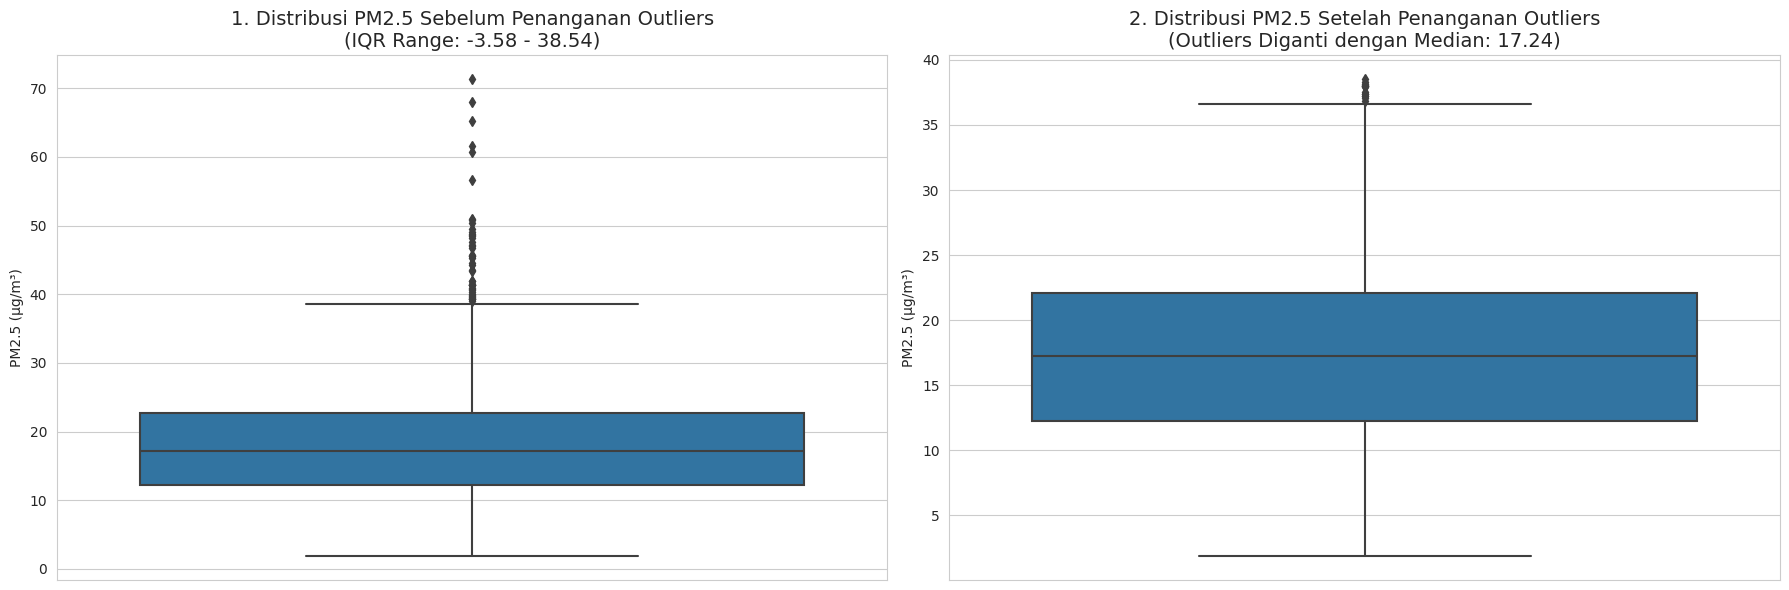

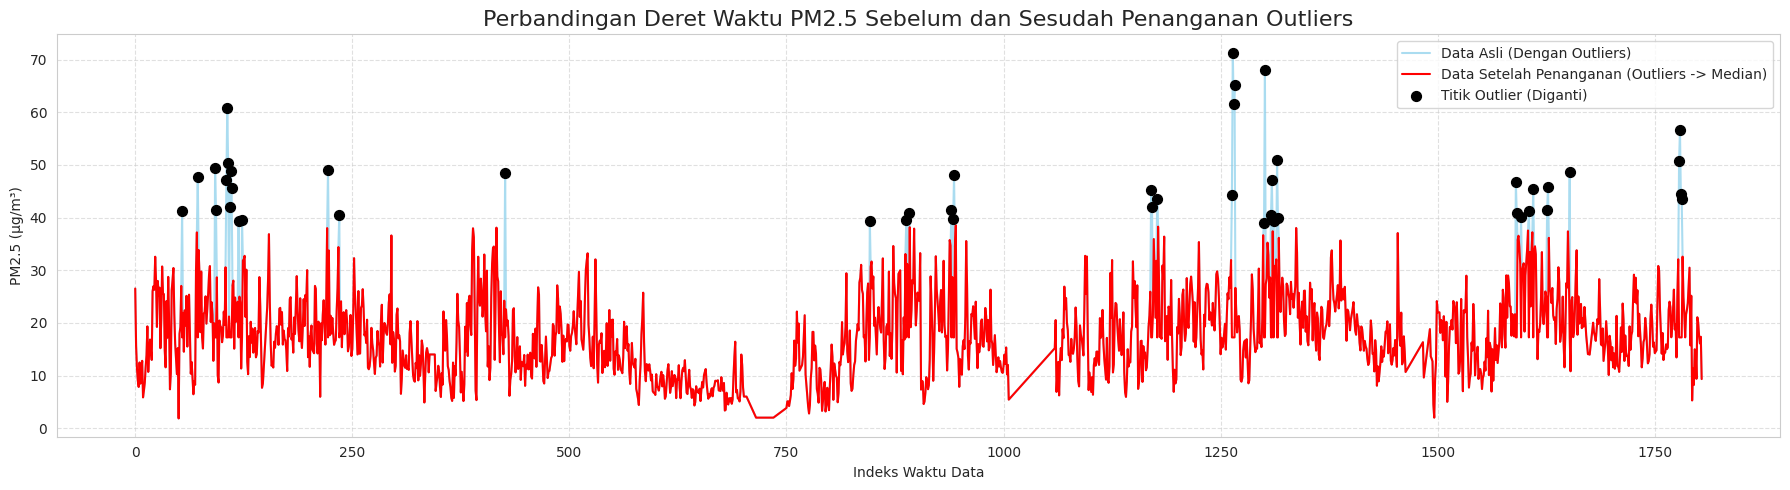

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tentukan path file
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'

# 2. Muat data
try:
    # Asumsikan data PM2.5 berada di sheet pertama dan tidak ada header
    # Sesuaikan 'header=None' jika file Anda memiliki header.
    df = pd.read_excel(file_path, header=0)
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {file_path}. Mohon periksa path.")
    exit()

# Anggap kolom yang relevan adalah 'PM2.5'
# Sesuaikan nama kolom jika berbeda di file Excel Anda
TARGET_COLUMN = 'PM2.5'

# Pastikan kolom target adalah numerik
df[TARGET_COLUMN] = pd.to_numeric(df[TARGET_COLUMN], errors='coerce')
df.dropna(subset=[TARGET_COLUMN], inplace=True) # Hapus baris yang mungkin menjadi NaN setelah konversi

# --- 3. Implementasi IQR untuk Deteksi Outliers ---

# a. Hitung Kuartil dan IQR
Q1 = df[TARGET_COLUMN].quantile(0.25)
Q3 = df[TARGET_COLUMN].quantile(0.75)
IQR = Q3 - Q1

# b. Tentukan Batas Atas dan Batas Bawah
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR

# c. Identifikasi Outliers
outliers_mask = (df[TARGET_COLUMN] < LOWER_BOUND) | (df[TARGET_COLUMN] > UPPER_BOUND)
outliers_count = outliers_mask.sum()
median_value = df[TARGET_COLUMN].median()

print(f"--- Hasil Deteksi IQR ---")
print(f"Q1 (Kuartil 1): {Q1:.2f}")
print(f"Q3 (Kuartil 3): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Batas Bawah (L): {LOWER_BOUND:.2f}")
print(f"Batas Atas (U): {UPPER_BOUND:.2f}")
print(f"Jumlah Outliers Terdeteksi: {outliers_count}")
print(f"Nilai Median (untuk Imputasi): {median_value:.2f}\n")


# --- 4. Penanganan Outliers (Mengganti dengan Median) ---

df_cleaned = df.copy()

# Ganti nilai outliers dengan nilai median
df_cleaned.loc[outliers_mask, TARGET_COLUMN] = median_value

print(f"Jumlah data outliers yang telah diganti dengan Median: {outliers_count}")


# --- 5. Visualisasi Hasil ---

# Gunakan Matplotlib dan Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(18, 6))

# Plot 1: Box Plot (Sebelum dan Sesudah)
plt.subplot(1, 2, 1)
sns.boxplot(y=df[TARGET_COLUMN])
plt.title(f'1. Distribusi PM2.5 Sebelum Penanganan Outliers\n(IQR Range: {LOWER_BOUND:.2f} - {UPPER_BOUND:.2f})', fontsize=14)
plt.ylabel(f'{TARGET_COLUMN} (µg/m³)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned[TARGET_COLUMN])
plt.title(f'2. Distribusi PM2.5 Setelah Penanganan Outliers\n(Outliers Diganti dengan Median: {median_value:.2f})', fontsize=14)
plt.ylabel(f'{TARGET_COLUMN} (µg/m³)')

plt.tight_layout()
plt.show()

# Plot 2: Perbandingan Deret Waktu
plt.figure(figsize=(18, 5))
plt.plot(df.index, df[TARGET_COLUMN], label='Data Asli (Dengan Outliers)', color='skyblue', alpha=0.7)
plt.plot(df_cleaned.index, df_cleaned[TARGET_COLUMN], label='Data Setelah Penanganan (Outliers -> Median)', color='red', linestyle='-', linewidth=1.5)

# Tandai Outliers pada data asli
outliers_data = df[outliers_mask]
plt.scatter(outliers_data.index, outliers_data[TARGET_COLUMN], color='black', label='Titik Outlier (Diganti)', marker='o', s=50, zorder=3)

plt.title('Perbandingan Deret Waktu PM2.5 Sebelum dan Sesudah Penanganan Outliers', fontsize=16)
plt.xlabel('Indeks Waktu Data')
plt.ylabel(f'{TARGET_COLUMN} (µg/m³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# --- 1. Membaca Data dan Koreksi Encoding ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Membersihkan kolom yang tidak diperlukan ('No') berdasarkan snippet yang Anda berikan
# dan memastikan kolom tanggal dan target yang benar
if 'No' in df.columns:
    df = df[['Tanggal', 'PM2.5']]

df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5'] # Memastikan nama kolom target benar

# --- 2. Penanganan Missing Value (KNN Imputer) ---

# Mengidentifikasi jumlah missing value sebelum imputasi
missing_before = df['PM2.5'].isnull().sum()
if missing_before > 0:
    # Menggunakan KNNImputer dengan k=5 (nilai k umum)
    imputer = KNNImputer(n_neighbors=5)
    
    # Fit dan Transform data.
    # KNNImputer bekerja pada array, sehingga harus diberikan shape (N, 1)
    df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
    
    missing_after = df['PM2.5'].isnull().sum()
    print(f"\n--- KNN Imputation ---")
    print(f"Missing Value Awal: {missing_before}")
    print(f"Missing Value Akhir: {missing_after}")
else:
    print("\nTidak ada Missing Value yang terdeteksi. Melewati KNN Imputation.")


# --- 3. Penanganan Outliers (IQR Method) ---

# Menghitung Kuartil dan IQR
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR

# Menghitung nilai Median untuk Imputasi Outlier
MEDIAN_VALUE = df['PM2.5'].median()

# Mendeteksi Outliers
outliers_mask = (df['PM2.5'] < LOWER_BOUND) | (df['PM2.5'] > UPPER_BOUND)
outliers_count = outliers_mask.sum()

if outliers_count > 0:
    # Mengganti Outliers dengan Median
    df_cleaned = df.copy()
    df_cleaned.loc[outliers_mask, 'PM2.5'] = MEDIAN_VALUE

    print(f"\n--- IQR Outliers Handling ---")
    print(f"Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"Batas Bawah (L): {LOWER_BOUND:.2f} | Batas Atas (U): {UPPER_BOUND:.2f}")
    print(f"Jumlah Outliers Terdeteksi: {outliers_count}")
    print(f"Nilai Median (untuk Imputasi): {MEDIAN_VALUE:.2f}")
    print(f"Jumlah data outliers yang telah diganti dengan Median: {outliers_count}")
else:
    df_cleaned = df.copy()
    print("\nTidak ada Outliers yang terdeteksi. Melewati IQR Handling.")

# --- 4. Data Final ---
# df_cleaned adalah DataFrame yang sudah bersih (KNN + IQR)
print("\nDataFrame Akhir (Sudah Bersih):")
print(df_cleaned.head())
print(f"Jumlah baris data bersih: {len(df_cleaned)}")


--- KNN Imputation ---
Missing Value Awal: 157
Missing Value Akhir: 0

--- IQR Outliers Handling ---
Q1: 12.76 | Q3: 22.16 | IQR: 9.40
Batas Bawah (L): -1.35 | Batas Atas (U): 36.27
Jumlah Outliers Terdeteksi: 66
Nilai Median (untuk Imputasi): 17.98
Jumlah data outliers yang telah diganti dengan Median: 66

DataFrame Akhir (Sudah Bersih):
            PM2.5
Tanggal          
2020-01-01  26.52
2020-01-02  15.65
2020-01-03  11.35
2020-01-04   9.02
2020-01-05   7.83
Jumlah baris data bersih: 1827


17:58:05 - cmdstanpy - INFO - Chain [1] start processing
17:58:05 - cmdstanpy - INFO - Chain [1] done processing



[Preprocessing] KNN Imputation selesai. MV Awal: 157
[Preprocessing] IQR Outliers Handling selesai. 66 outliers diganti.

[Modeling] Ukuran data training: 1278, testing: 549

[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 7 hari.

FINAL MODEL EVALUATION PROPHET (CUSTOM S=7 TUNING)
MAE: 4.79
RMSE: 6.05
MAPE: 31.16%


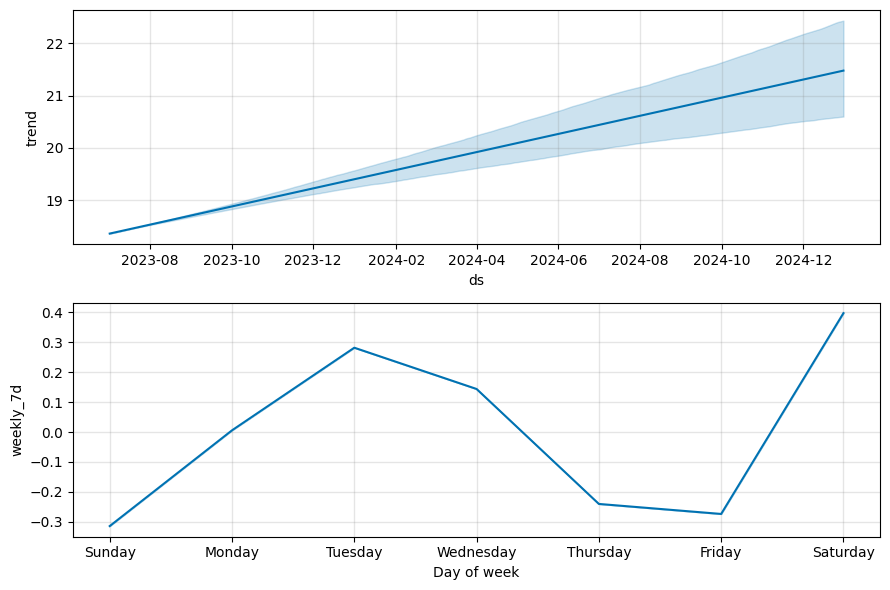

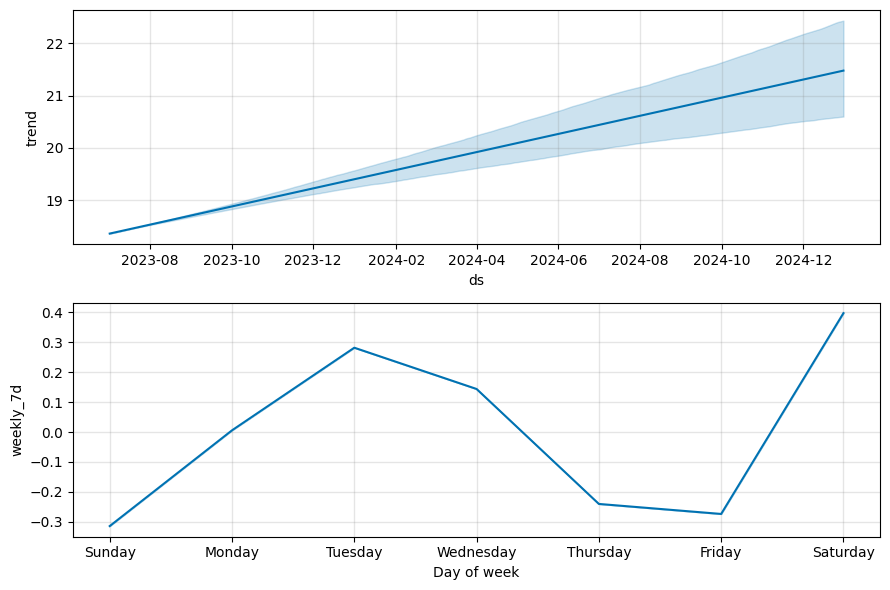

In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Fungsi aman untuk menghitung MAPE, menghindari pembagian dengan nol
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Menghindari pembagian dengan nol: ganti 0 dengan nilai sangat kecil (epsilon)
    epsilon = np.finfo(float).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, epsilon))) * 100

# --- 1. Membaca Data dan Preprocessing (KNN & IQR) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Pembersihan dan Koreksi Kolom
df = df[['Tanggal', 'PM2.5']].copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5']

# KNN Imputer
missing_before = df['PM2.5'].isnull().sum()
if missing_before > 0:
    imputer = KNNImputer(n_neighbors=5)
    df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
    print(f"\n[Preprocessing] KNN Imputation selesai. MV Awal: {missing_before}")

# IQR Outliers Handling
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR
MEDIAN_VALUE = df['PM2.5'].median()

outliers_mask = (df['PM2.5'] < LOWER_BOUND) | (df['PM2.5'] > UPPER_BOUND)
outliers_count = outliers_mask.sum()

if outliers_count > 0:
    df_cleaned = df.copy()
    df_cleaned.loc[outliers_mask, 'PM2.5'] = MEDIAN_VALUE
    print(f"[Preprocessing] IQR Outliers Handling selesai. {outliers_count} outliers diganti.")
else:
    df_cleaned = df.copy()

# --- 2. Persiapan Data untuk Prophet ---
# Prophet membutuhkan kolom 'ds' (datetime) dan 'y' (target)
df_prophet = df_cleaned.reset_index().rename(columns={'Tanggal': 'ds', 'PM2.5': 'y'})

# --- 3. Pembagian Data Training dan Testing (Misal 80:20) ---
train_size = int(len(df_prophet) * 0.7) 
df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]
print(f"\n[Modeling] Ukuran data training: {len(df_train)}, testing: {len(df_test)}")

# --- 4. Konfigurasi dan Tuning Model Prophet (Custom Seasonality S=30) ---

# Inisialisasi Model Prophet
m = Prophet(
    growth='linear',
    # Menonaktifkan musiman bawaan untuk fokus pada S=30 (meniru SARIMA)
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    # Coba tuning changepoint_prior_scale yang lebih kecil untuk tren yang lebih stabil
    changepoint_prior_scale=0.01 
)

# Tambahkan Custom Seasonality 30 hari (Hyperparameter Tuning S=30)
# fourier_order=10 adalah nilai yang cukup baik untuk menangkap pola bulanan
m.add_seasonality(name='weekly_7d', period=7, fourier_order=5)
print("\n[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 7 hari.")

# --- 5. Pelatihan dan Prediksi ---
m.fit(df_train)

# Buat dataframe masa depan untuk periode testing
future = df_test[['ds']]
forecast = m.predict(future)

# --- 6. Evaluasi Model ---

y_pred_prophet_30d = forecast['yhat']
y_true = df_test['y']

mae = mean_absolute_error(y_true, y_pred_prophet_30d)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet_30d))
mape = calculate_mape(y_true, y_pred_prophet_30d)

# --- 7. Output Hasil ---
print("\n==================================================")
print(f"FINAL MODEL EVALUATION PROPHET (CUSTOM S=7 TUNING)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("==================================================")

# Visualisasi Komponen Tuning S=7
m.plot_components(forecast)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Fungsi aman untuk menghitung MAPE, menghindari pembagian dengan nol
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Menghindari pembagian dengan nol: ganti 0 dengan nilai sangat kecil (epsilon)
    epsilon = np.finfo(float).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, epsilon))) * 100

# --- 1. Membaca Data dan Preprocessing (KNN & IQR) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Pembersihan dan Koreksi Kolom
df = df[['Tanggal', 'PM2.5']].copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5']

# KNN Imputer
missing_before = df['PM2.5'].isnull().sum()
if missing_before > 0:
    imputer = KNNImputer(n_neighbors=5)
    df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
    print(f"\n[Preprocessing] KNN Imputation selesai. MV Awal: {missing_before}")

# IQR Outliers Handling
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR
MEDIAN_VALUE = df['PM2.5'].median()

outliers_mask = (df['PM2.5'] < LOWER_BOUND) | (df['PM2.5'] > UPPER_BOUND)
outliers_count = outliers_mask.sum()

if outliers_count > 0:
    df_cleaned = df.copy()
    df_cleaned.loc[outliers_mask, 'PM2.5'] = MEDIAN_VALUE
    print(f"[Preprocessing] IQR Outliers Handling selesai. {outliers_count} outliers diganti.")
else:
    df_cleaned = df.copy()

# --- 2. Persiapan Data untuk Prophet ---
# Prophet membutuhkan kolom 'ds' (datetime) dan 'y' (target)
df_prophet = df_cleaned.reset_index().rename(columns={'Tanggal': 'ds', 'PM2.5': 'y'})

# --- 3. Pembagian Data Training dan Testing (Misal 70:30) ---
train_size = int(len(df_prophet) * 0.7) 
df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]
print(f"\n[Modeling] Ukuran data training: {len(df_train)}, testing: {len(df_test)}")

# --- 4. Konfigurasi dan Tuning Model Prophet (Custom Seasonality S=30) ---

# Inisialisasi Model Prophet
m = Prophet(
    growth='linear',
    # Menonaktifkan musiman bawaan untuk fokus pada S=30 (meniru SARIMA)
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    # Coba tuning changepoint_prior_scale yang lebih kecil untuk tren yang lebih stabil
    changepoint_prior_scale=0.01 
)

# Tambahkan Custom Seasonality 30 hari (Hyperparameter Tuning S=30)
# fourier_order=10 adalah nilai yang cukup baik untuk menangkap pola bulanan
m.add_seasonality(name='monthly_30d', period=30, fourier_order=5)
print("\n[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 30 hari.")

# --- 5. Pelatihan dan Prediksi ---
m.fit(df_train)

# Buat dataframe masa depan untuk periode testing
future = df_test[['ds']]
forecast = m.predict(future)

# --- 6. Evaluasi Model ---

y_pred_prophet_30d = forecast['yhat']
y_true = df_test['y']

mae = mean_absolute_error(y_true, y_pred_prophet_30d)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet_30d))
mape = calculate_mape(y_true, y_pred_prophet_30d)

# --- 7. Output Hasil ---
print("\n==================================================")
print(f"FINAL MODEL EVALUATION PROPHET (CUSTOM S=30 TUNING)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("==================================================")

# Visualisasi Komponen Tuning S=30
m.plot_components(forecast)

18:01:41 - cmdstanpy - INFO - Chain [1] start processing
18:01:41 - cmdstanpy - INFO - Chain [1] done processing



[Preprocessing] KNN Imputation selesai. MV Awal: 157
[Preprocessing] IQR Outliers Handling selesai. 66 outliers diganti.

[Modeling] Ukuran data training: 1278, testing: 549

[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 60 hari.

FINAL MODEL EVALUATION PROPHET (CUSTOM S=60 TUNING)
MAE: 4.84
RMSE: 6.11
MAPE: 31.63%


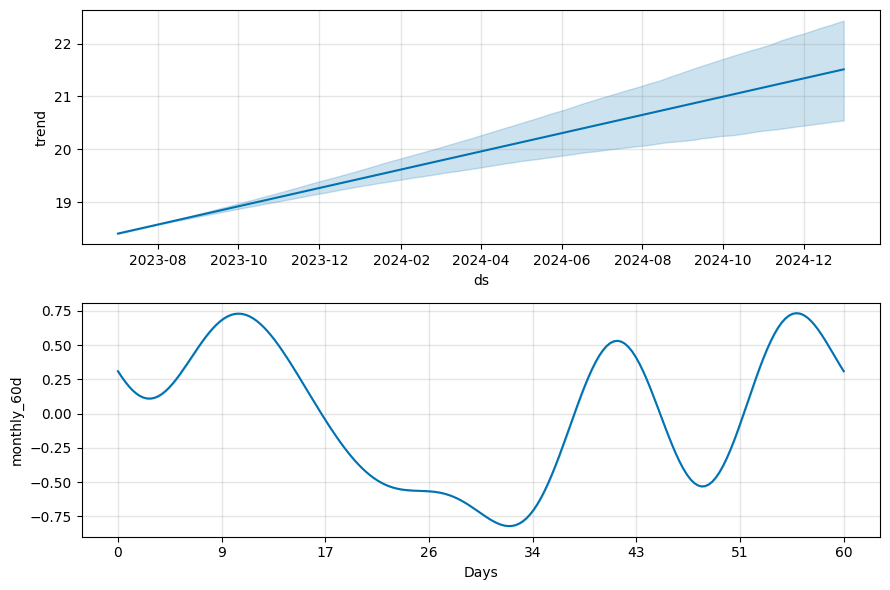

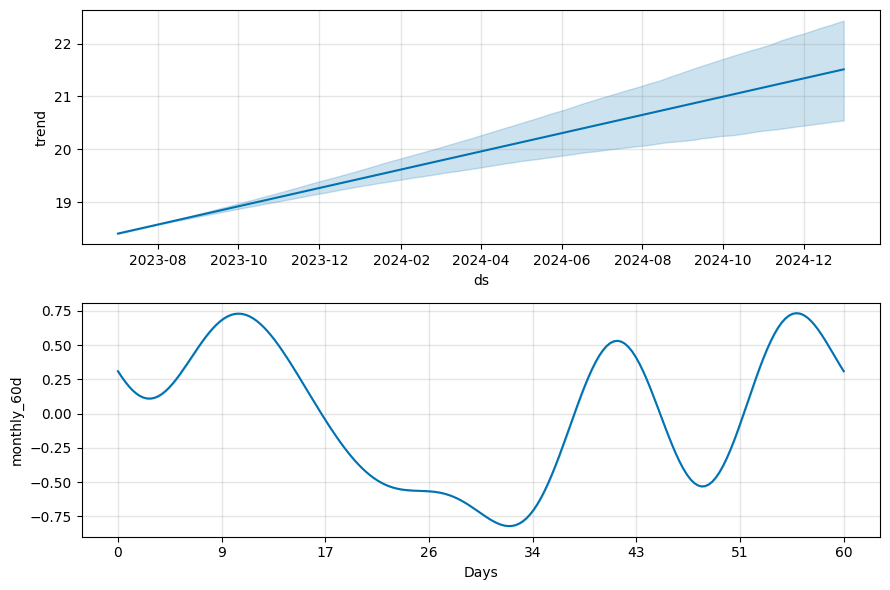

In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Fungsi aman untuk menghitung MAPE, menghindari pembagian dengan nol
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Menghindari pembagian dengan nol: ganti 0 dengan nilai sangat kecil (epsilon)
    epsilon = np.finfo(float).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, epsilon))) * 100

# --- 1. Membaca Data dan Preprocessing (KNN & IQR) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Pembersihan dan Koreksi Kolom
df = df[['Tanggal', 'PM2.5']].copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5']

# KNN Imputer
missing_before = df['PM2.5'].isnull().sum()
if missing_before > 0:
    imputer = KNNImputer(n_neighbors=5)
    df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
    print(f"\n[Preprocessing] KNN Imputation selesai. MV Awal: {missing_before}")

# IQR Outliers Handling
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR
MEDIAN_VALUE = df['PM2.5'].median()

outliers_mask = (df['PM2.5'] < LOWER_BOUND) | (df['PM2.5'] > UPPER_BOUND)
outliers_count = outliers_mask.sum()

if outliers_count > 0:
    df_cleaned = df.copy()
    df_cleaned.loc[outliers_mask, 'PM2.5'] = MEDIAN_VALUE
    print(f"[Preprocessing] IQR Outliers Handling selesai. {outliers_count} outliers diganti.")
else:
    df_cleaned = df.copy()

# --- 2. Persiapan Data untuk Prophet ---
# Prophet membutuhkan kolom 'ds' (datetime) dan 'y' (target)
df_prophet = df_cleaned.reset_index().rename(columns={'Tanggal': 'ds', 'PM2.5': 'y'})

# --- 3. Pembagian Data Training dan Testing (Misal 80:20) ---
train_size = int(len(df_prophet) * 0.7) 
df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]
print(f"\n[Modeling] Ukuran data training: {len(df_train)}, testing: {len(df_test)}")

# --- 4. Konfigurasi dan Tuning Model Prophet (Custom Seasonality S=30) ---

# Inisialisasi Model Prophet
m = Prophet(
    growth='linear',
    # Menonaktifkan musiman bawaan untuk fokus pada S=30 (meniru SARIMA)
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    # Coba tuning changepoint_prior_scale yang lebih kecil untuk tren yang lebih stabil
    changepoint_prior_scale=0.01 
)

# Tambahkan Custom Seasonality 30 hari (Hyperparameter Tuning S=30)
# fourier_order=10 adalah nilai yang cukup baik untuk menangkap pola bulanan
m.add_seasonality(name='monthly_60d', period=60, fourier_order=5)
print("\n[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 60 hari.")

# --- 5. Pelatihan dan Prediksi ---
m.fit(df_train)

# Buat dataframe masa depan untuk periode testing
future = df_test[['ds']]
forecast = m.predict(future)

# --- 6. Evaluasi Model ---

y_pred_prophet_30d = forecast['yhat']
y_true = df_test['y']

mae = mean_absolute_error(y_true, y_pred_prophet_30d)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet_30d))
mape = calculate_mape(y_true, y_pred_prophet_30d)

# --- 7. Output Hasil ---
print("\n==================================================")
print(f"FINAL MODEL EVALUATION PROPHET (CUSTOM S=60 TUNING)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("==================================================")

# Visualisasi Komponen Tuning S=7
m.plot_components(forecast)

18:01:34 - cmdstanpy - INFO - Chain [1] start processing
18:01:34 - cmdstanpy - INFO - Chain [1] done processing



[Preprocessing] KNN Imputation selesai. MV Awal: 157
[Preprocessing] IQR Outliers Handling selesai. 66 outliers diganti.

[Modeling] Ukuran data training: 1278, testing: 549

[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 90 hari.

FINAL MODEL EVALUATION PROPHET (CUSTOM S=90 TUNING)
MAE: 4.88
RMSE: 6.08
MAPE: 32.01%


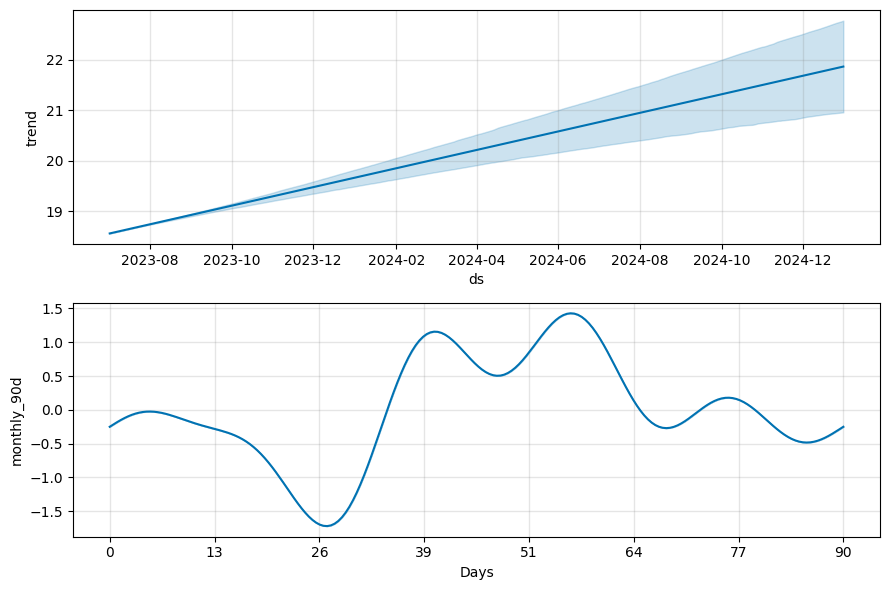

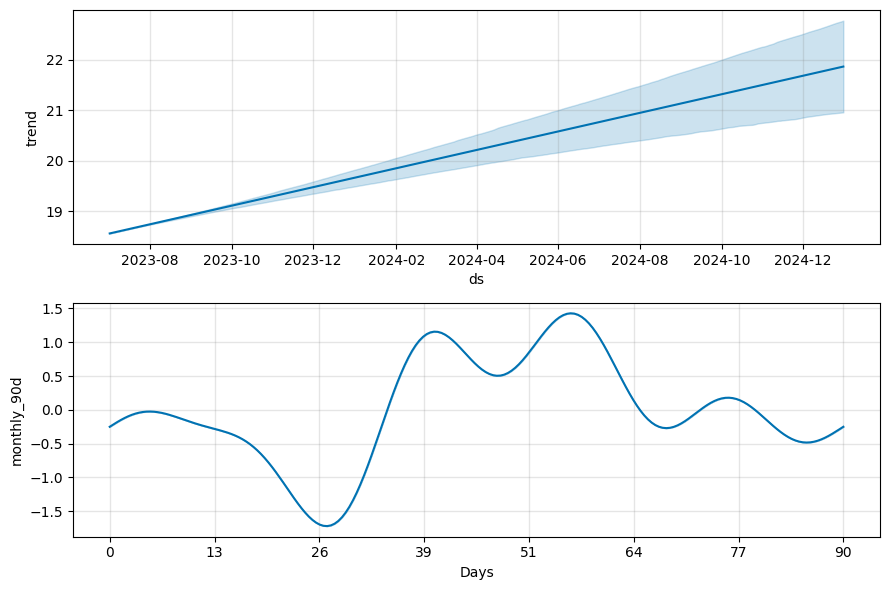

In [29]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Fungsi aman untuk menghitung MAPE, menghindari pembagian dengan nol
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Menghindari pembagian dengan nol: ganti 0 dengan nilai sangat kecil (epsilon)
    epsilon = np.finfo(float).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, epsilon))) * 100

# --- 1. Membaca Data dan Preprocessing (KNN & IQR) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Pembersihan dan Koreksi Kolom
df = df[['Tanggal', 'PM2.5']].copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5']

# KNN Imputer
missing_before = df['PM2.5'].isnull().sum()
if missing_before > 0:
    imputer = KNNImputer(n_neighbors=5)
    df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
    print(f"\n[Preprocessing] KNN Imputation selesai. MV Awal: {missing_before}")

# IQR Outliers Handling
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR
MEDIAN_VALUE = df['PM2.5'].median()

outliers_mask = (df['PM2.5'] < LOWER_BOUND) | (df['PM2.5'] > UPPER_BOUND)
outliers_count = outliers_mask.sum()

if outliers_count > 0:
    df_cleaned = df.copy()
    df_cleaned.loc[outliers_mask, 'PM2.5'] = MEDIAN_VALUE
    print(f"[Preprocessing] IQR Outliers Handling selesai. {outliers_count} outliers diganti.")
else:
    df_cleaned = df.copy()

# --- 2. Persiapan Data untuk Prophet ---
# Prophet membutuhkan kolom 'ds' (datetime) dan 'y' (target)
df_prophet = df_cleaned.reset_index().rename(columns={'Tanggal': 'ds', 'PM2.5': 'y'})

# --- 3. Pembagian Data Training dan Testing (Misal 80:20) ---
train_size = int(len(df_prophet) * 0.7) 
df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]
print(f"\n[Modeling] Ukuran data training: {len(df_train)}, testing: {len(df_test)}")

# --- 4. Konfigurasi dan Tuning Model Prophet (Custom Seasonality S=30) ---

# Inisialisasi Model Prophet
m = Prophet(
    growth='linear',
    # Menonaktifkan musiman bawaan untuk fokus pada S=30 (meniru SARIMA)
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    # Coba tuning changepoint_prior_scale yang lebih kecil untuk tren yang lebih stabil
    changepoint_prior_scale=0.01 
)

# Tambahkan Custom Seasonality 30 hari (Hyperparameter Tuning S=30)
# fourier_order=10 adalah nilai yang cukup baik untuk menangkap pola bulanan
m.add_seasonality(name='monthly_90d', period=90, fourier_order=5)
print("\n[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 90 hari.")

# --- 5. Pelatihan dan Prediksi ---
m.fit(df_train)

# Buat dataframe masa depan untuk periode testing
future = df_test[['ds']]
forecast = m.predict(future)

# --- 6. Evaluasi Model ---

y_pred_prophet_30d = forecast['yhat']
y_true = df_test['y']

mae = mean_absolute_error(y_true, y_pred_prophet_30d)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet_30d))
mape = calculate_mape(y_true, y_pred_prophet_30d)

# --- 7. Output Hasil ---
print("\n==================================================")
print(f"FINAL MODEL EVALUATION PROPHET (CUSTOM S=90 TUNING)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("==================================================")

# Visualisasi Komponen Tuning S=7
m.plot_components(forecast)

18:02:33 - cmdstanpy - INFO - Chain [1] start processing
18:02:33 - cmdstanpy - INFO - Chain [1] done processing



[Preprocessing] KNN Imputation selesai. MV Awal: 157
[Preprocessing] IQR Outliers Handling selesai. 66 outliers diganti.

[Modeling] Ukuran data training: 1278, testing: 549

[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 180 hari.

FINAL MODEL EVALUATION PROPHET (CUSTOM S=180 TUNING)
MAE: 4.89
RMSE: 6.04
MAPE: 31.73%


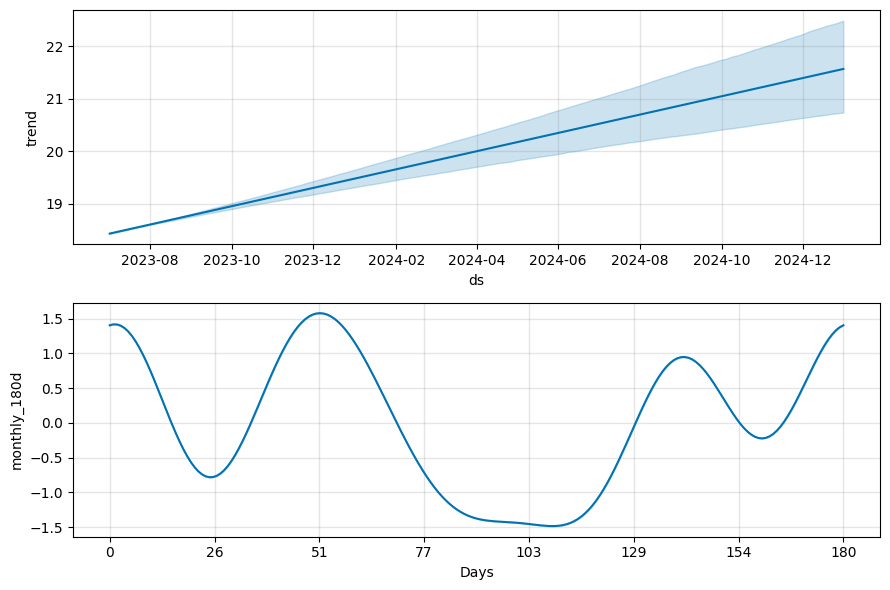

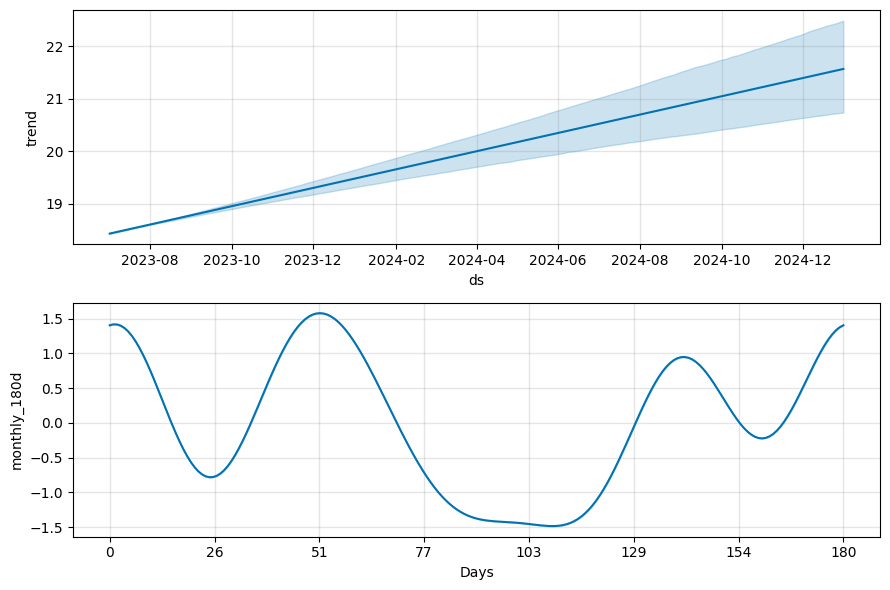

In [31]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Fungsi aman untuk menghitung MAPE, menghindari pembagian dengan nol
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Menghindari pembagian dengan nol: ganti 0 dengan nilai sangat kecil (epsilon)
    epsilon = np.finfo(float).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, epsilon))) * 100

# --- 1. Membaca Data dan Preprocessing (KNN & IQR) ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Pembersihan dan Koreksi Kolom
df = df[['Tanggal', 'PM2.5']].copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5']

# KNN Imputer
missing_before = df['PM2.5'].isnull().sum()
if missing_before > 0:
    imputer = KNNImputer(n_neighbors=5)
    df['PM2.5'] = imputer.fit_transform(df[['PM2.5']])
    print(f"\n[Preprocessing] KNN Imputation selesai. MV Awal: {missing_before}")

# IQR Outliers Handling
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5 * IQR
UPPER_BOUND = Q3 + 1.5 * IQR
MEDIAN_VALUE = df['PM2.5'].median()

outliers_mask = (df['PM2.5'] < LOWER_BOUND) | (df['PM2.5'] > UPPER_BOUND)
outliers_count = outliers_mask.sum()

if outliers_count > 0:
    df_cleaned = df.copy()
    df_cleaned.loc[outliers_mask, 'PM2.5'] = MEDIAN_VALUE
    print(f"[Preprocessing] IQR Outliers Handling selesai. {outliers_count} outliers diganti.")
else:
    df_cleaned = df.copy()

# --- 2. Persiapan Data untuk Prophet ---
# Prophet membutuhkan kolom 'ds' (datetime) dan 'y' (target)
df_prophet = df_cleaned.reset_index().rename(columns={'Tanggal': 'ds', 'PM2.5': 'y'})

# --- 3. Pembagian Data Training dan Testing (Misal 80:20) ---
train_size = int(len(df_prophet) * 0.7) 
df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]
print(f"\n[Modeling] Ukuran data training: {len(df_train)}, testing: {len(df_test)}")

# --- 4. Konfigurasi dan Tuning Model Prophet (Custom Seasonality S=30) ---

# Inisialisasi Model Prophet
m = Prophet(
    growth='linear',
    # Menonaktifkan musiman bawaan untuk fokus pada S=30 (meniru SARIMA)
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    # Coba tuning changepoint_prior_scale yang lebih kecil untuk tren yang lebih stabil
    changepoint_prior_scale=0.01 
)

# Tambahkan Custom Seasonality 30 hari (Hyperparameter Tuning S=30)
# fourier_order=10 adalah nilai yang cukup baik untuk menangkap pola bulanan
m.add_seasonality(name='monthly_180d', period=180, fourier_order=5)
print("\n[Tuning] Model Prophet dikonfigurasi dengan Custom Seasonality 180 hari.")

# --- 5. Pelatihan dan Prediksi ---
m.fit(df_train)

# Buat dataframe masa depan untuk periode testing
future = df_test[['ds']]
forecast = m.predict(future)

# --- 6. Evaluasi Model ---

y_pred_prophet_30d = forecast['yhat']
y_true = df_test['y']

mae = mean_absolute_error(y_true, y_pred_prophet_30d)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet_30d))
mape = calculate_mape(y_true, y_pred_prophet_30d)

# --- 7. Output Hasil ---
print("\n==================================================")
print(f"FINAL MODEL EVALUATION PROPHET (CUSTOM S=180 TUNING)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print("==================================================")

# Visualisasi Komponen Tuning S=7
m.plot_components(forecast)

Data dipotong dari 2021-12-31 hingga 2024-12-31
Jumlah data setelah pemotongan dan pembersihan: 1097
Frekuensi data: <Day>
SARIMA(0, 0, 0)(0, 0, 0, 30) - MAPE: 100.00%, MAE: 19.16, RMSE: 20.05
SARIMA(0, 0, 0)(0, 0, 1, 30) - MAPE: 96.75%, MAE: 18.65, RMSE: 19.69
SARIMA(0, 0, 0)(0, 1, 0, 30) - MAPE: 31.77%, MAE: 5.33, RMSE: 7.10
SARIMA(0, 0, 0)(0, 1, 1, 30) - MAPE: 28.08%, MAE: 4.58, RMSE: 5.99
SARIMA(0, 0, 0)(1, 0, 0, 30) - MAPE: 54.52%, MAE: 10.66, RMSE: 12.19
SARIMA(0, 0, 0)(1, 0, 1, 30) - MAPE: 27.87%, MAE: 4.59, RMSE: 6.00
SARIMA(0, 0, 0)(1, 1, 0, 30) - MAPE: 28.72%, MAE: 5.09, RMSE: 6.56
SARIMA(0, 0, 0)(1, 1, 1, 30) - MAPE: 28.05%, MAE: 4.58, RMSE: 5.99
SARIMA(0, 0, 1)(0, 0, 0, 30) - MAPE: 99.96%, MAE: 19.16, RMSE: 20.05
SARIMA(0, 0, 1)(0, 0, 1, 30) - MAPE: 97.04%, MAE: 18.69, RMSE: 19.69
SARIMA(0, 0, 1)(0, 1, 0, 30) - MAPE: 31.61%, MAE: 5.35, RMSE: 7.12
SARIMA(0, 0, 1)(0, 1, 1, 30) - MAPE: 27.88%, MAE: 4.58, RMSE: 5.99
SARIMA(0, 0, 1)(1, 0, 0, 30) - MAPE: 66.00%, MAE: 12.95, RMSE:

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)(1, 0, 1, 30) - MAPE: 84.18%, MAE: 16.45, RMSE: 17.49
SARIMA(0, 1, 0)(1, 1, 0, 30) - MAPE: 327.96%, MAE: 59.53, RMSE: 66.32
SARIMA(0, 1, 0)(1, 1, 1, 30) - MAPE: 116.67%, MAE: 22.20, RMSE: 23.31
SARIMA(0, 1, 1)(0, 0, 0, 30) - MAPE: 71.34%, MAE: 14.24, RMSE: 15.41
SARIMA(0, 1, 1)(0, 0, 1, 30) - MAPE: 68.32%, MAE: 13.72, RMSE: 14.93
SARIMA(0, 1, 1)(0, 1, 0, 30) - MAPE: 509.56%, MAE: 91.54, RMSE: 103.39
SARIMA(0, 1, 1)(0, 1, 1, 30) - MAPE: 93.96%, MAE: 18.25, RMSE: 19.38
SARIMA(0, 1, 1)(1, 0, 0, 30) - MAPE: 68.21%, MAE: 13.70, RMSE: 14.91
SARIMA(0, 1, 1)(1, 0, 1, 30) - MAPE: 67.98%, MAE: 13.66, RMSE: 14.87
SARIMA(0, 1, 1)(1, 1, 0, 30) - MAPE: 283.79%, MAE: 51.74, RMSE: 57.67
SARIMA(0, 1, 1)(1, 1, 1, 30) - MAPE: 93.90%, MAE: 18.25, RMSE: 19.45
SARIMA(1, 0, 0)(0, 0, 0, 30) - MAPE: 99.05%, MAE: 19.02, RMSE: 19.93
SARIMA(1, 0, 0)(0, 0, 1, 30) - MAPE: 99.06%, MAE: 19.02, RMSE: 19.93
SARIMA(1, 0, 0)(0, 1, 0, 30) - MAPE: 32.02%, MAE: 5.58, RMSE: 7.31
SARIMA(1, 0, 0)(0, 1, 1, 30) - 

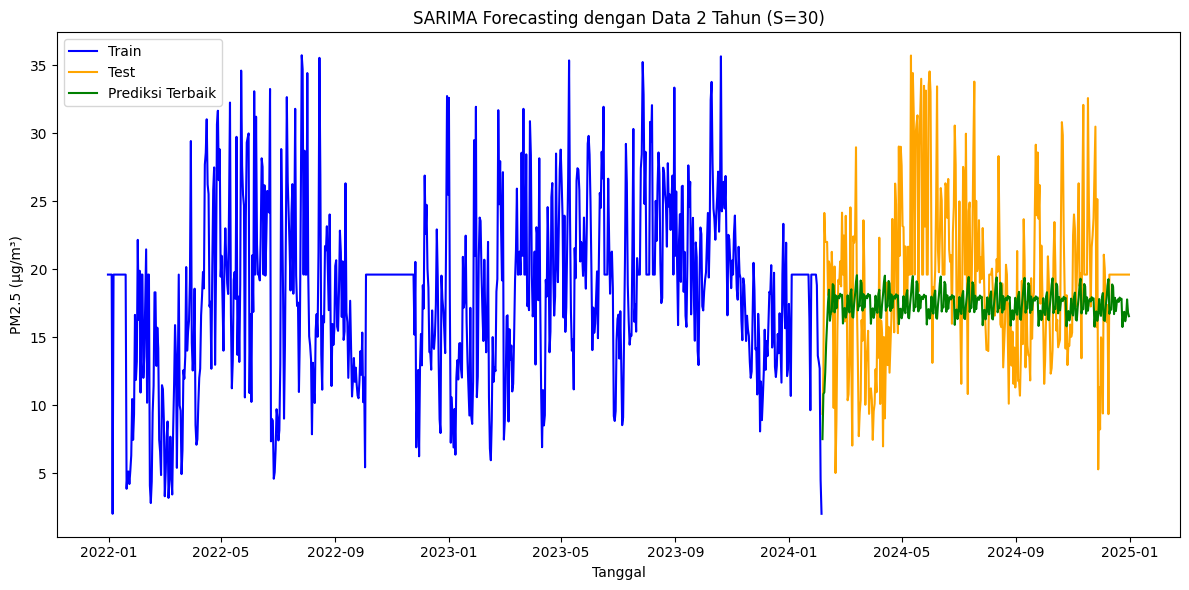

Last Value Model - MAE: 17.16, RMSE: 18.15, MAPE: 88.35%


In [8]:
import pandas as pd
import numpy as np
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# --- 1. MUAT DATA, POTONG, DAN PRE-PROSESING ---
file_path = '/kaggle/input/data-pm25/data_pm.xlsx'
df = pd.read_excel(file_path)

# Konversi dan set indeks Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)

# POTONG DATA MENJADI 2 TAHUN TERAKHIR
# Tentukan tanggal awal pemotongan (2 tahun dari tanggal terakhir di data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(years=3)
df_sliced = df[df.index >= start_date].copy()

# Pisahkan data numerik (hanya PM2.5 untuk skrip ini)
df_numeric = df_sliced[['PM2.5']].select_dtypes(include=np.number)

# --- 2. PENANGANAN MISSING VALUE DENGAN KNN ---
# Re-index untuk memastikan semua tanggal harian ada dan buat NaN jika ada yang hilang
date_range = pd.date_range(start=df_numeric.index.min(), end=df_numeric.index.max(), freq='D')
df_numeric = df_numeric.reindex(date_range)
df_numeric.index.name = 'Tanggal'

# Terapkan KNN Imputer pada data PM2.5 yang mungkin memiliki NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), 
                          columns=df_numeric.columns, 
                          index=df_numeric.index)
y_clean = df_imputed['PM2.5']

# --- 3. PENANGANAN OUTLIER (GANTI DENGAN MEDIAN) ---
Q1 = y_clean.quantile(0.25)
Q3 = y_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi dan Ganti Outlier dengan Median
outliers_mask = (y_clean < lower_bound) | (y_clean > upper_bound)
y_clean.loc[outliers_mask] = y_clean.median() 

print(f"Data dipotong dari {y_clean.index.min().date()} hingga {y_clean.index.max().date()}")
print(f"Jumlah data setelah pemotongan dan pembersihan: {len(y_clean)}")
print(f"Frekuensi data: {y_clean.index.freq}")

# --- 4. PEMBAGIAN DATA ---
TRAIN_RATIO = 0.7
split = int(len(y_clean) * TRAIN_RATIO)
y_train, y_test = y_clean[:split], y_clean[split:]

# --- 5. GRID SEARCH SARIMA (S=30) ---
P_LIST = [0, 1]
D_LIST = [0, 1]
Q_LIST = [0, 1]
S_LIST = [30] # Musiman bulanan

best_mape_sarima = float('inf')
best_model_sarima = None
best_params_sarima = None

# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    # Tambahkan epsilon untuk menghindari pembagian dengan nol jika y_true sangat kecil
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.finfo(float).eps))) * 100
    return mae, mse, rmse, mape

# Grid search
for p in P_LIST:
    for d in D_LIST:
        for q in Q_LIST:
            for P in P_LIST:
                for D in D_LIST:
                    for Q in Q_LIST:
                        for s in S_LIST:
                            try:
                                # SARIMAX dengan parameter yang dibatasi dan enforce_invertibility=False
                                model = SARIMAX(endog=y_train, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
                                fit = model.fit(disp=False)
                                
                                # Prediksi
                                pred = fit.get_prediction(start=y_test.index[0], end=y_test.index[-1])
                                pred_mean = pred.predicted_mean.dropna()
                                
                                # Pastikan panjang data cocok
                                if len(y_test) != len(pred_mean):
                                    continue
                                
                                # Evaluasi
                                mae, mse, rmse, mape = evaluate_model(y_test, pred_mean)
                                print(f"SARIMA({p}, {d}, {q})({P}, {D}, {Q}, {s}) - MAPE: {mape:.2f}%, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

                                # Simpan model terbaik
                                if mape < best_mape_sarima:
                                    best_mape_sarima = mape
                                    best_model_sarima = fit
                                    best_params_sarima = (p, d, q, P, D, Q, s)

                            except Exception as e:
                                # Lewati model yang gagal konvergensi atau memiliki error
                                continue

# --- 6. HASIL AKHIR DAN PLOT ---
if best_model_sarima is None:
    print("\nTidak ada model yang berhasil ditemukan selama grid search.")
else:
    # Prediksi dengan model terbaik
    pred_best_sarima = best_model_sarima.get_prediction(start=y_test.index[0], end=y_test.index[-1])
    pred_best_mean_sarima = pred_best_sarima.predicted_mean.dropna()

    # Evaluasi akhir model terbaik
    mae_sarima, mse_sarima, rmse_sarima, mape_sarima = evaluate_model(y_test, pred_best_mean_sarima)
    print("\n" + "="*50)
    print(f"Model SARIMA Terbaik: ({best_params_sarima[0]}, {best_params_sarima[1]}, {best_params_sarima[2]})({best_params_sarima[3]}, {best_params_sarima[4]}, {best_params_sarima[5]}, {best_params_sarima[6]})")
    print(f"Final Model Evaluation - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
    print("="*50)

    # Plot hasil prediksi
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(pred_best_mean_sarima.index, pred_best_mean_sarima, label='Prediksi Terbaik', color='green')
    plt.title('SARIMA Forecasting dengan Data 2 Tahun (S=30)')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Model prediksi nilai terakhir (last value model)
last_value = y_train.iloc[-1]  # Ambil nilai terakhir dari data latih
predictions_last_value = [last_value] * len(y_test)  # Ulangi nilai untuk seluruh data uji

# Evaluasi MAE, RMSE, dan MAPE untuk model last value
mae_last_value = mean_absolute_error(y_test, predictions_last_value)
rmse_last_value = math.sqrt(mean_squared_error(y_test, predictions_last_value))
mape_last_value = np.mean(np.abs((y_test - predictions_last_value) / y_test)) * 100

print(f"Last Value Model - MAE: {mae_last_value:.2f}, RMSE: {rmse_last_value:.2f}, MAPE: {mape_last_value:.2f}%")


[Data Mentah] Data yang akan divisualisasikan: 731 hari.
[Data Mentah] Rentang: 2023-01-01 hingga 2024-12-31


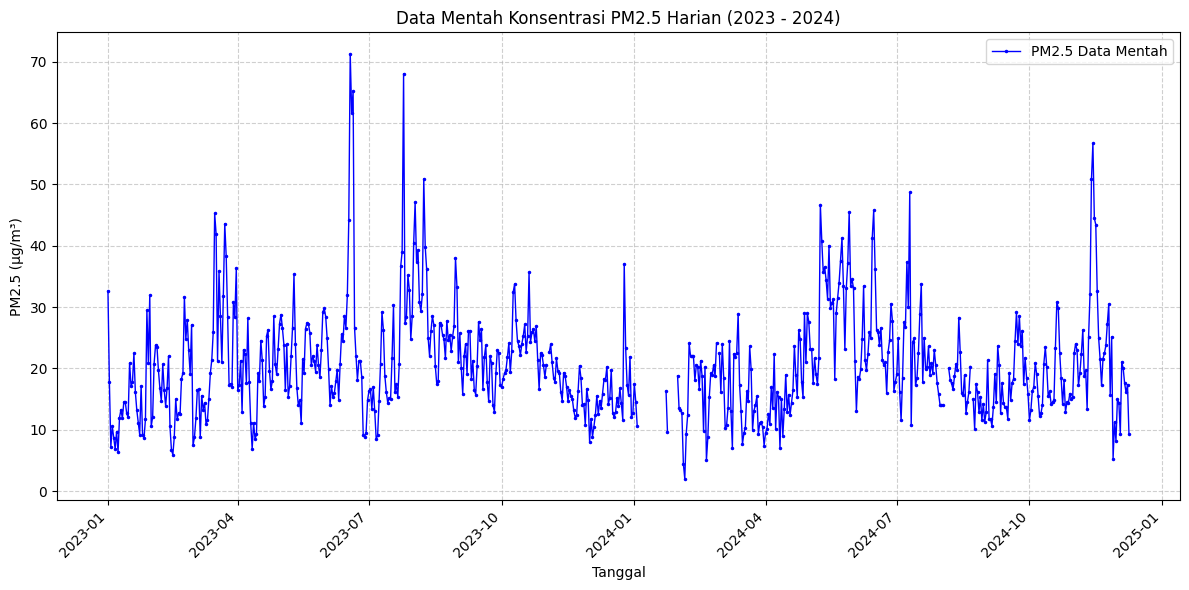

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. MEMUAT DAN MEMBATASI DATA MENTAH ---
# Ganti '/kaggle/input/data-pm25/data_pm.xlsx' dengan 'data_pm.xlsx' jika Anda menjalankan di lingkungan lokal/Colab
file_path = '/kaggle/input/data-pm25/data_pm.xlsx' 
df = pd.read_excel(file_path)

# Pembersihan dan Koreksi Kolom
df = df[['Tanggal', 'PM2.5']].copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.set_index('Tanggal')
df.columns = ['PM2.5']

# Batasi data mulai dari 1 Januari 2023
START_DATE = '2023-01-01'
df_raw_filtered = df[df.index >= START_DATE].copy()

print(f"[Data Mentah] Data yang akan divisualisasikan: {len(df_raw_filtered)} hari.")
print(f"[Data Mentah] Rentang: {df_raw_filtered.index.min().date()} hingga {df_raw_filtered.index.max().date()}")

# --- 2. VISUALISASI DATA MENTAH (RAW DATA) ---
plt.figure(figsize=(12, 6))

# Plot data PM2.5 mentah. 
# Catatan: Titik-titik putus pada garis menunjukkan Missing Values (NaN) dalam data mentah Anda.
plt.plot(df_raw_filtered.index, df_raw_filtered['PM2.5'], 
         label='PM2.5 Data Mentah', 
         color='blue', 
         marker='.', 
         linestyle='-', 
         linewidth=1,
         markersize=3)

plt.title(f'Data Mentah Konsentrasi PM2.5 Harian (2023 - {df_raw_filtered.index.max().year})')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

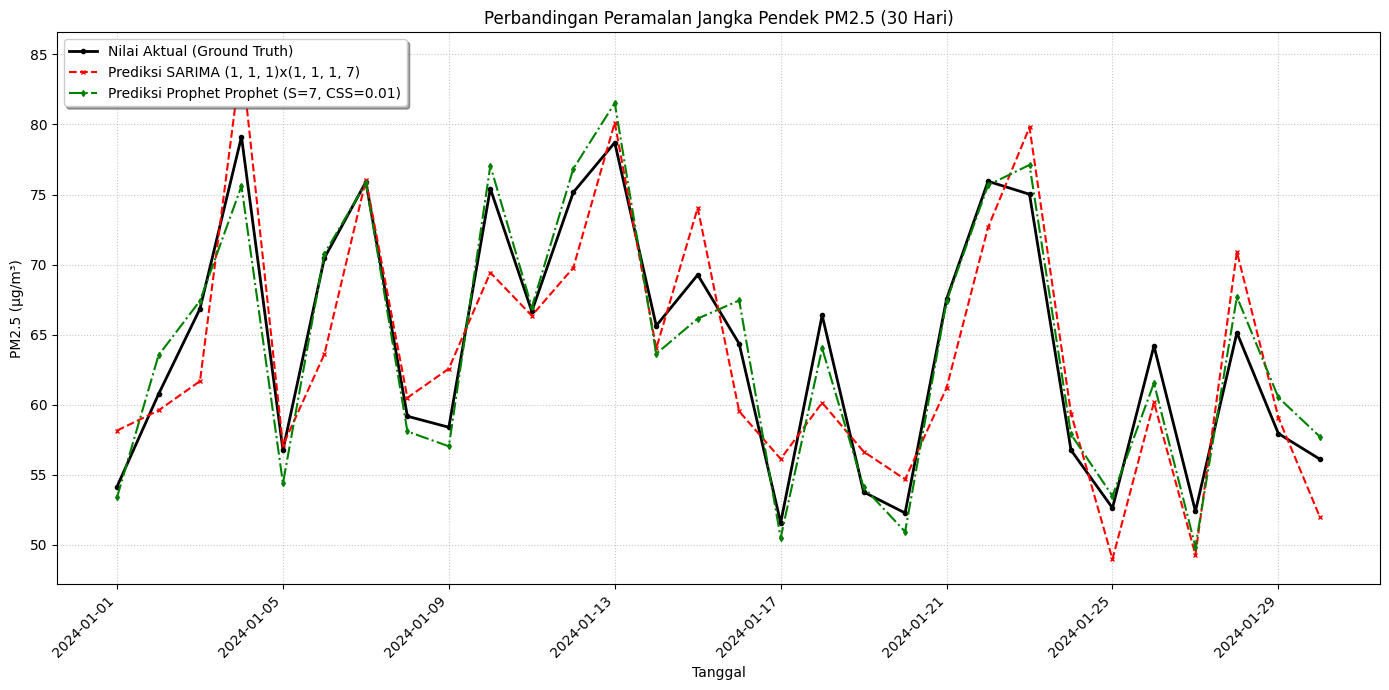

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# =================================================================
# TEMPAT GANTI DATA (Placeholder - Ganti dengan data aktual Anda)
# =================================================================

# 1. Buat Indeks Tanggal Uji Singkat (30 hari pertama dari test set)
# Ganti tanggal ini sesuai dengan tanggal awal test set Anda
start_test_date = '2024-01-01' 
SHORT_TERM_DAYS = 30
date_index_short = pd.date_range(start=start_test_date, periods=SHORT_TERM_DAYS, freq='D')

# 2. Data Aktual (PM2.5) 30 Hari
# Ganti dengan nilai y_test_short [PM2.5 AKTUAL] Anda
y_test_short_data = np.random.uniform(50, 80, SHORT_TERM_DAYS) 
y_test_short = pd.Series(y_test_short_data, index=date_index_short)

# 3. Prediksi Model ARIMA/SARIMA Terbaik
# Ganti dengan hasil prediksi ARIMA atau SARIMA terbaik Anda
pred_arima_sarima_data = y_test_short_data * (np.random.uniform(0.9, 1.1, SHORT_TERM_DAYS)) 
pred_arima_sarima_mean = pd.Series(pred_arima_sarima_data, index=date_index_short)
BEST_MODEL_PARAMS = "(1, 1, 1)x(1, 1, 1, 7)" # Ganti dengan parameter SARIMA terbaik Anda

# 4. Prediksi Model Prophet (yang sudah di-tuning)
# Ganti dengan hasil prediksi Prophet Anda
pred_prophet_data = y_test_short_data * (np.random.uniform(0.95, 1.05, SHORT_TERM_DAYS)) 
pred_prophet_mean = pd.Series(pred_prophet_data, index=date_index_short)
PROPHET_PARAMS = "Prophet (S=7, CSS=0.01)" # Ganti dengan tuning yang Anda gunakan

# =================================================================
# FUNGSI PLOTTING KOMPARATIF
# =================================================================

plt.figure(figsize=(14, 7))

# 1. Plot Data Aktual (Truth)
plt.plot(y_test_short.index, y_test_short, 
         label='Nilai Aktual (Ground Truth)', 
         color='black', 
         linewidth=2, 
         marker='o', 
         markersize=3)

# 2. Plot Prediksi ARIMA/SARIMA
plt.plot(pred_arima_sarima_mean.index, pred_arima_sarima_mean,
         label=f'Prediksi SARIMA {BEST_MODEL_PARAMS}', 
         color='red', 
         linestyle='--', 
         linewidth=1.5,
         marker='x', 
         markersize=3)

# 3. Plot Prediksi Prophet
plt.plot(pred_prophet_mean.index, pred_prophet_mean,
         label=f'Prediksi Prophet {PROPHET_PARAMS}', 
         color='green', 
         linestyle='-.', 
         linewidth=1.5,
         marker='d', 
         markersize=3)

# Pengaturan Visualisasi
plt.title(f'Perbandingan Peramalan Jangka Pendek PM2.5 (30 Hari)')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend(loc='upper left', frameon=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---
# Catatan Tambahan untuk Skripsi:
# Tambahkan juga plot perbandingan metrik (MAE, RMSE, MAPE) dalam bentuk bar chart 
# untuk melengkapi visualisasi time series ini.